In [1]:
import sys
sys.path.insert(0, '/Users/hinzlehome/codeup-data-science/time-series-exercises/')
from utils.imports import *
from utils.acquire import *
from utils.prepare import *

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
# plotting defaults
plt.rc('figure', figsize=(16, 9))
plt.style.use('seaborn-darkgrid')
plt.rc('font', size=16)

# plt.style.available
# ^^^ show available seaborn styles

In [3]:
store=merge_on_sales()
store = prep_store_data(store)

cached csv
cached csv
cached csv


In [4]:
store.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_id        913000 non-null  int64  
 1   quantity       913000 non-null  float64
 2   sale_id        913000 non-null  int64  
 3   store_id       913000 non-null  int64  
 4   item_brand     913000 non-null  object 
 5   item_name      913000 non-null  object 
 6   item_price     913000 non-null  float64
 7   item_upc12     913000 non-null  int64  
 8   item_upc14     913000 non-null  int64  
 9   store_address  913000 non-null  object 
 10  store_city     913000 non-null  object 
 11  store_state    913000 non-null  object 
 12  store_zipcode  913000 non-null  int64  
 13  month          913000 non-null  int64  
 14  dow            913000 non-null  object 
 15  sales_total    913000 non-null  float64
dtypes: float64(3), int64(7), object(6)
memory usage: 118.4+ MB

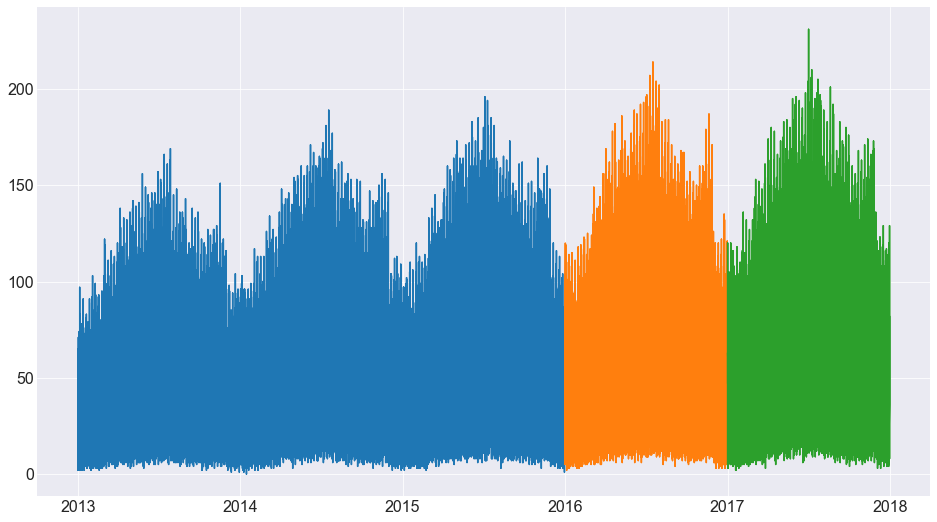

In [5]:
train = store.loc[:'2015'] # includes 2016
validate =store.loc['2016'] 
test = store.loc['2017']

plt.plot(train.index, train.quantity)
plt.plot(validate.index, validate.quantity)
plt.plot(test.index, test.quantity)


Column: item_id


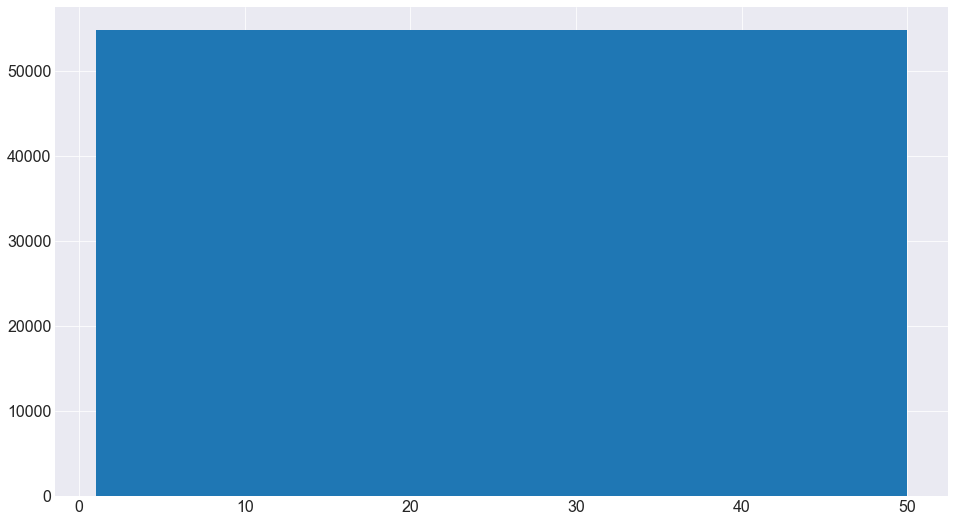

Column: quantity


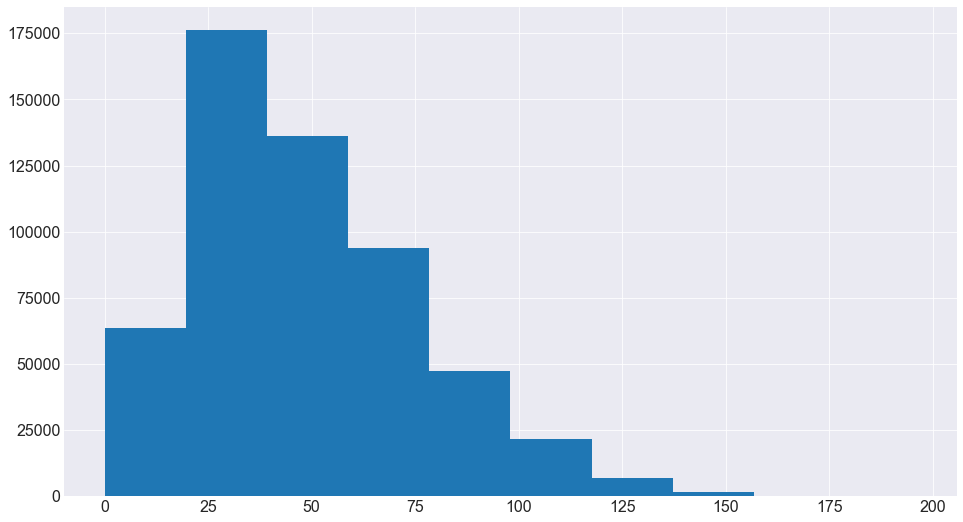

Column: sale_id


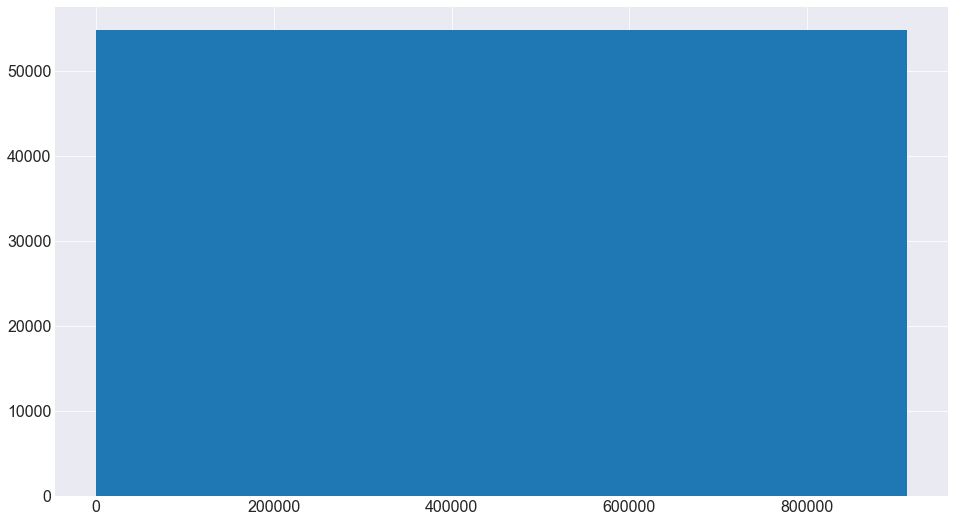

Column: store_id


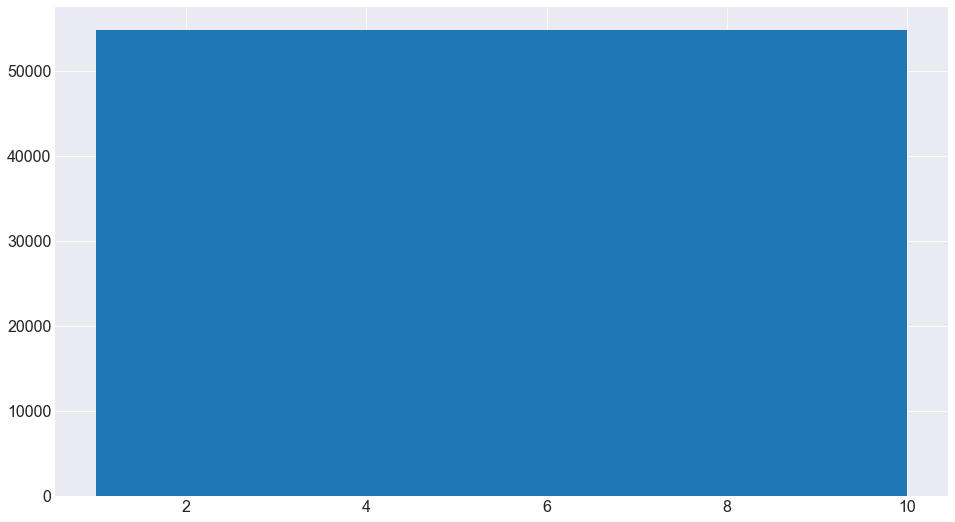

Column: item_brand


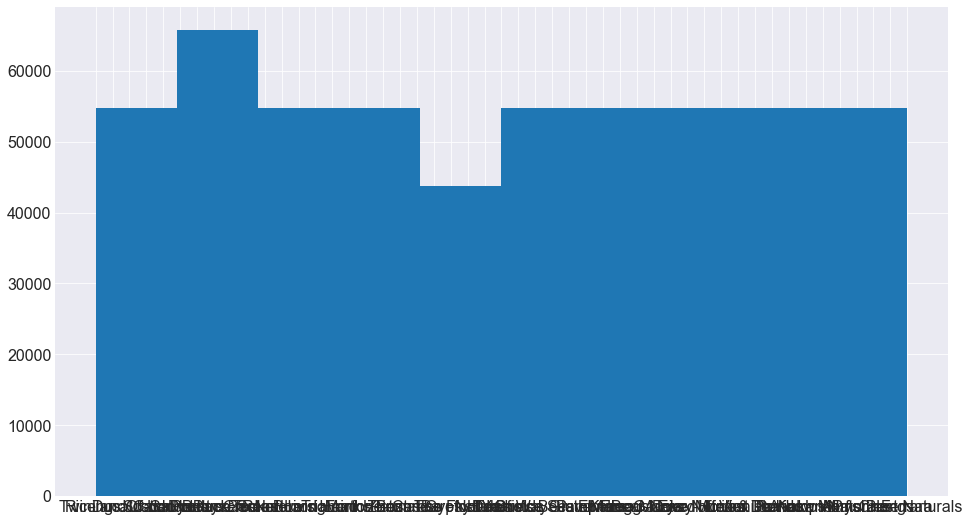

Column: item_name


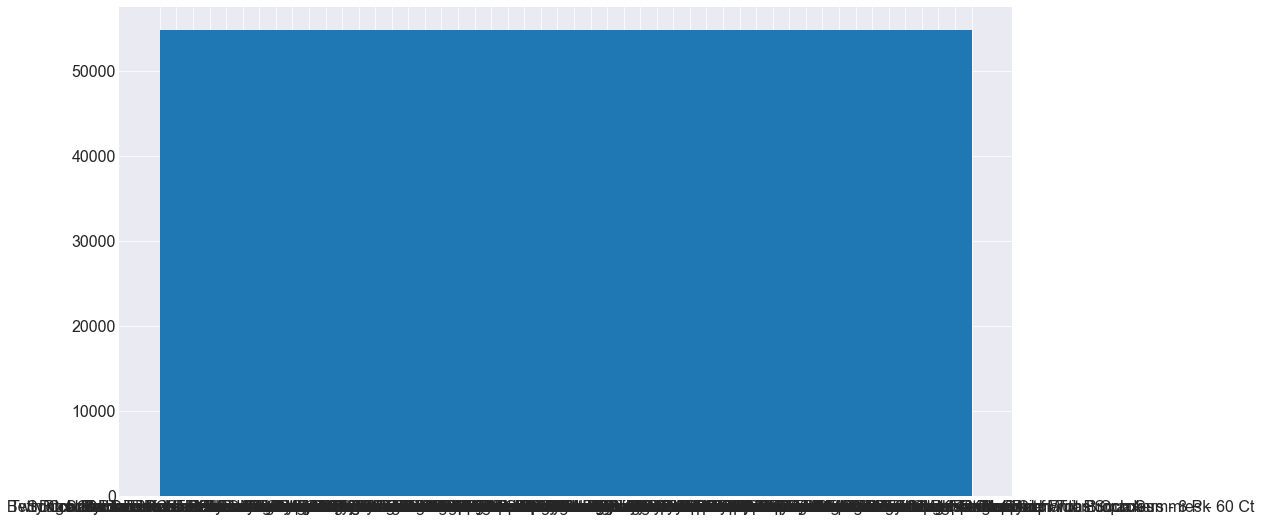

Column: item_price


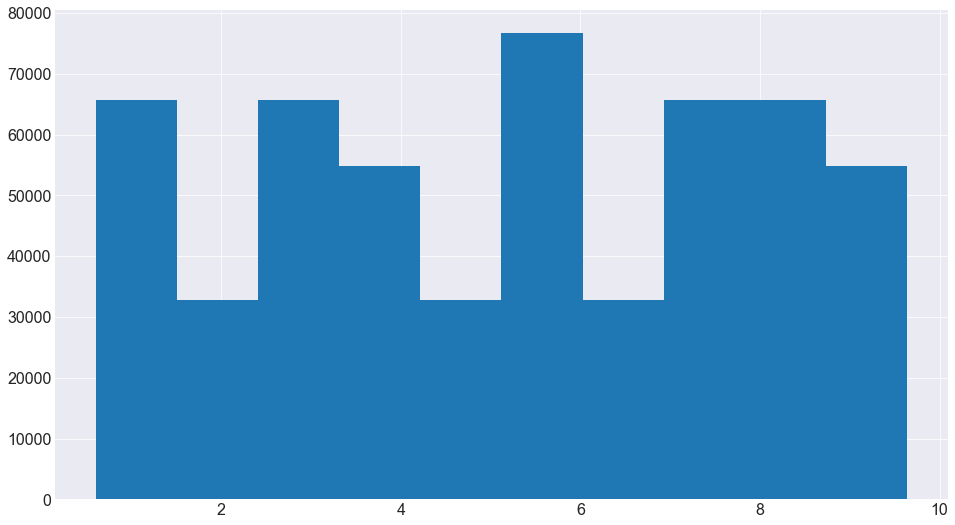

Column: item_upc12


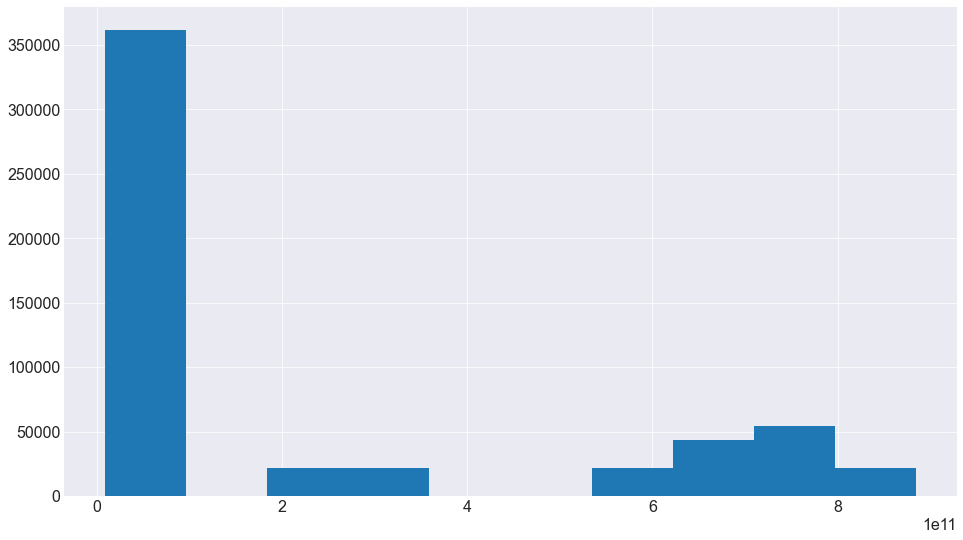

Column: item_upc14


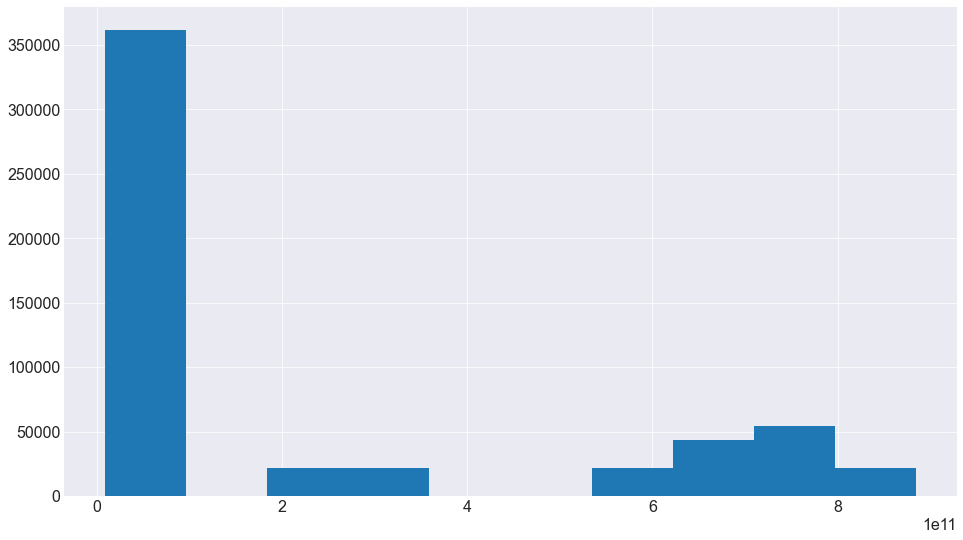

Column: store_address


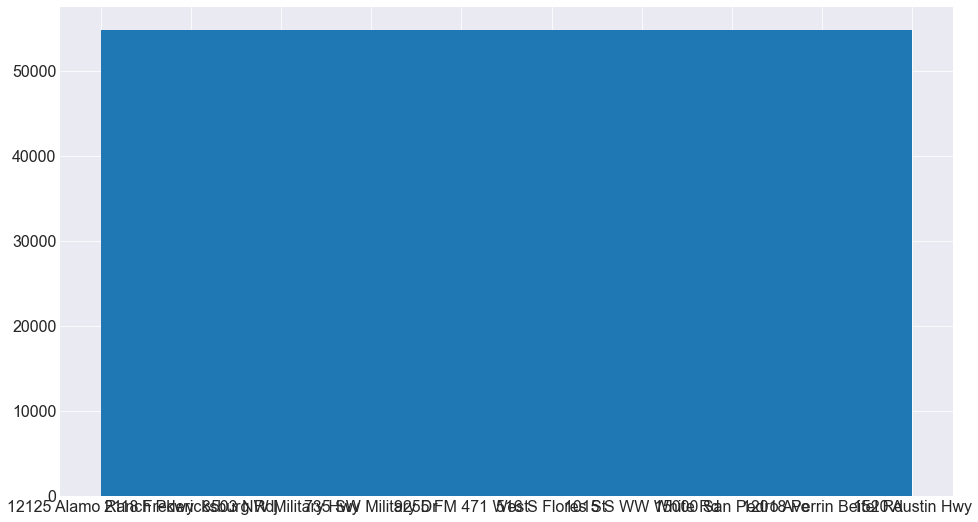

Column: store_city


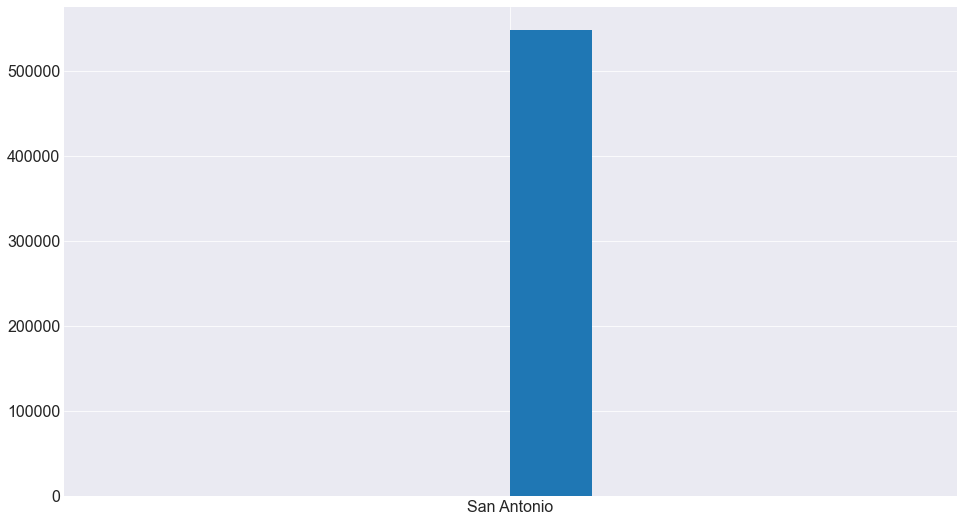

Column: store_state


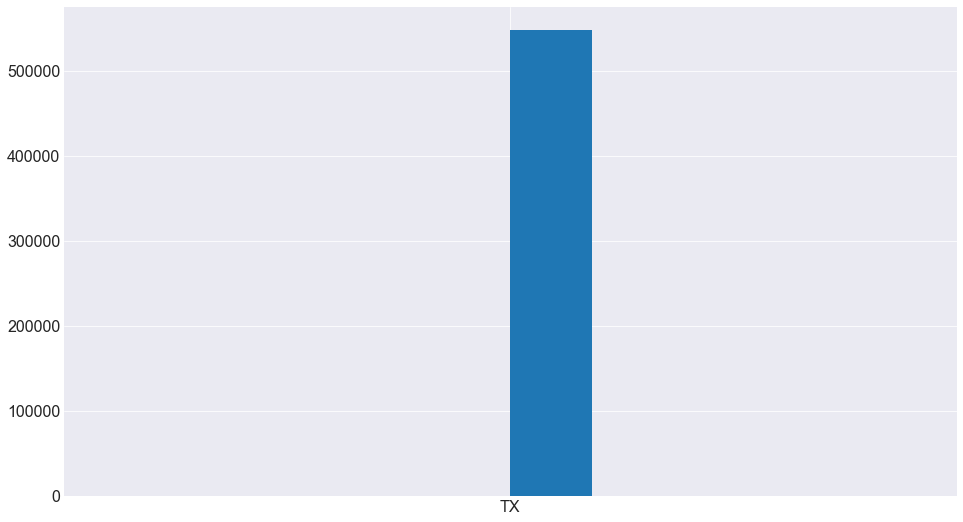

Column: store_zipcode


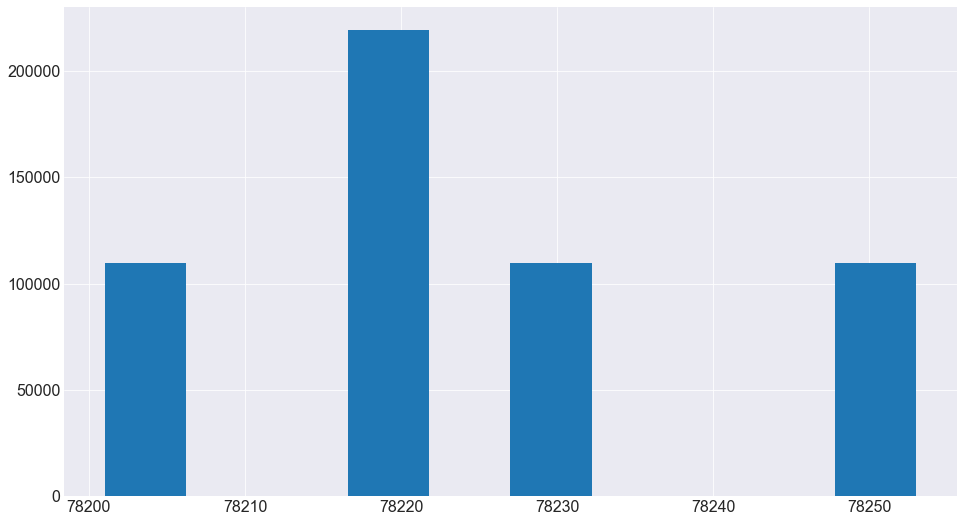

Column: month


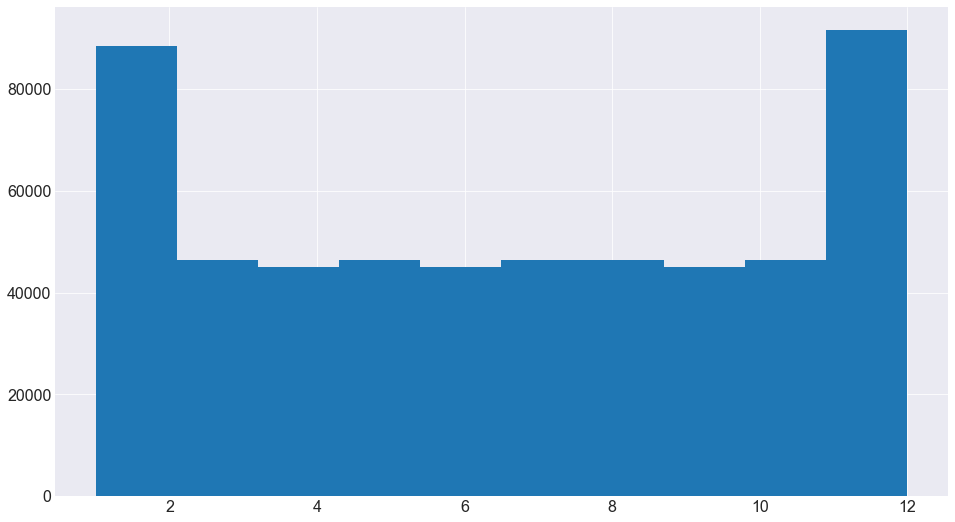

Column: dow


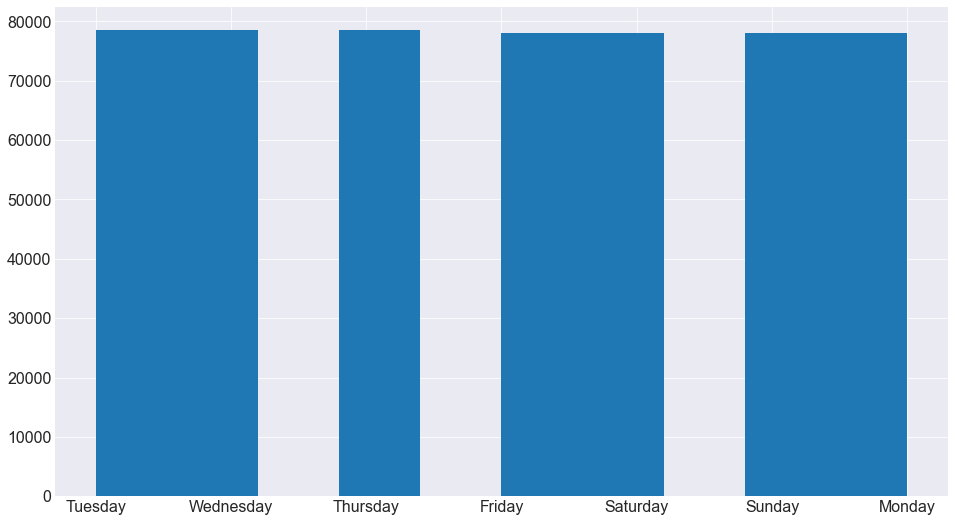

Column: sales_total


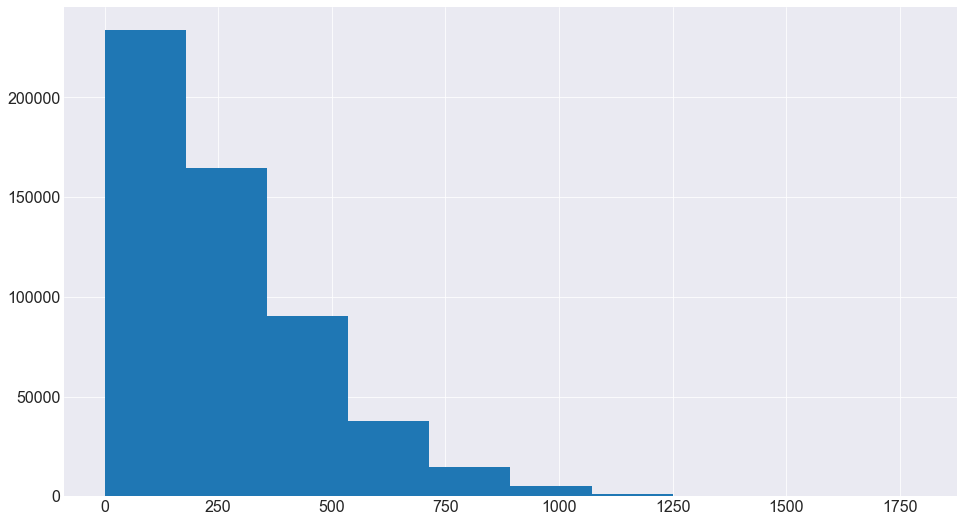

In [6]:
# univariate analysis of columns:
for col in train.columns:
    print('Column: ' + col)
    plt.hist(train[col])
    plt.show()

In [7]:
# [sns.displot(store[col] ,kde = True, rug = True) for col in store.columns.to_list()]

In [8]:
# [sns.relplot(x=store.index,y=col,data=store) for col in store.columns.to_list()]

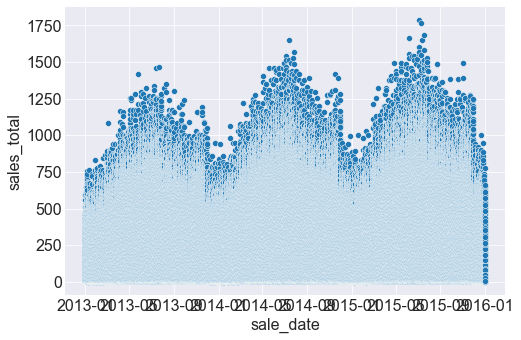

In [9]:
sns.relplot(x=train.index, y='sales_total',data=train,aspect=1.5)

In [10]:
# train.select_dtypes('number')

In [11]:
# l=zip([1,2,3],['a','b','c'])

In [12]:
# for x,y in zip(df.x, df.y):
	# print(x,y)



In [13]:
# df=pd.DataFrame(data=(zip([1,2,3],['a','b','c'])))

In [14]:
# df.columns=['x','y']

D Daily
W Weekly
M Monthly
Q Quarterly
Y Yearly


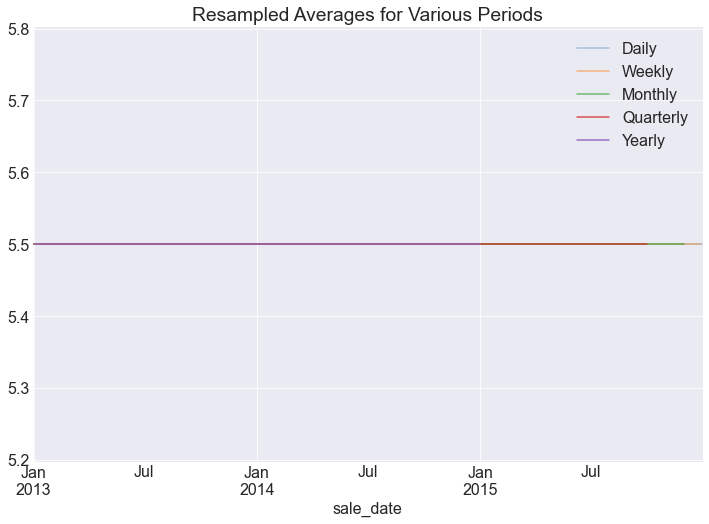

In [15]:
# for col in train.columns.to_list():
#     if train[col].dtype

target='store_id'
periods = ['D', 'W', 'M','Q', 'Y']
period_labels = ['Daily', 'Weekly', 
                 'Monthly', 'Quarterly', 'Yearly']
                 
alpha = .2
for per, per_label in zip(periods, period_labels):
    print(per,per_label)
    alpha += .15
    train[target].resample(per).mean().plot(alpha=alpha, 
                                            figsize=(12,8), 
                                            label=per_label)
plt.title('Resampled Averages for Various Periods')
plt.legend()
plt.show()

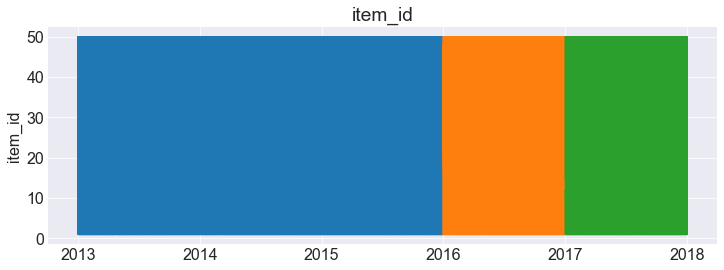

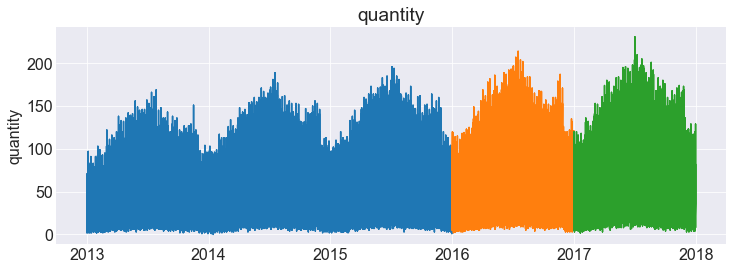

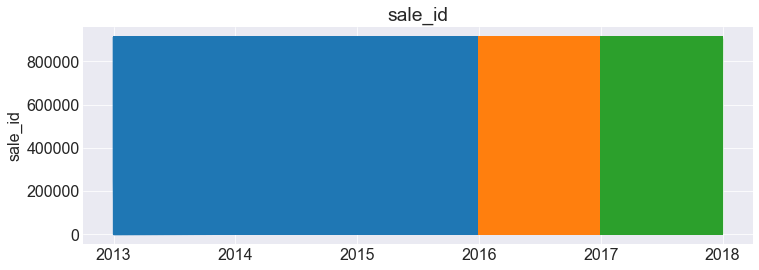

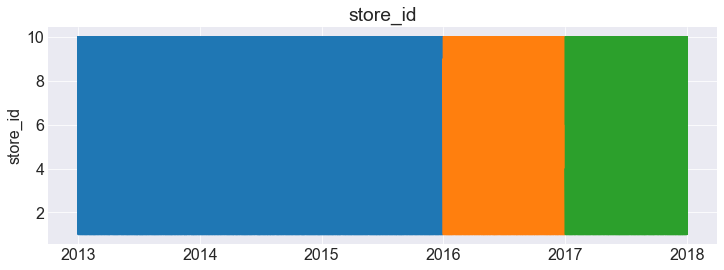

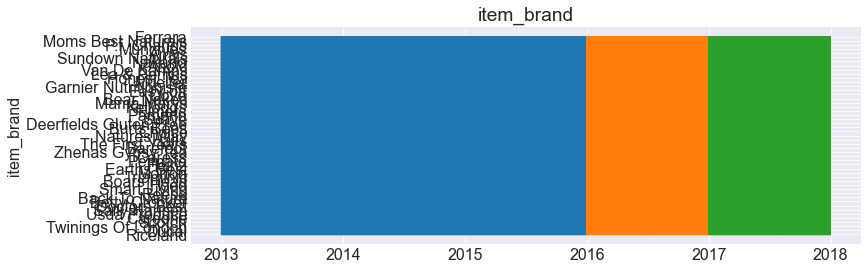

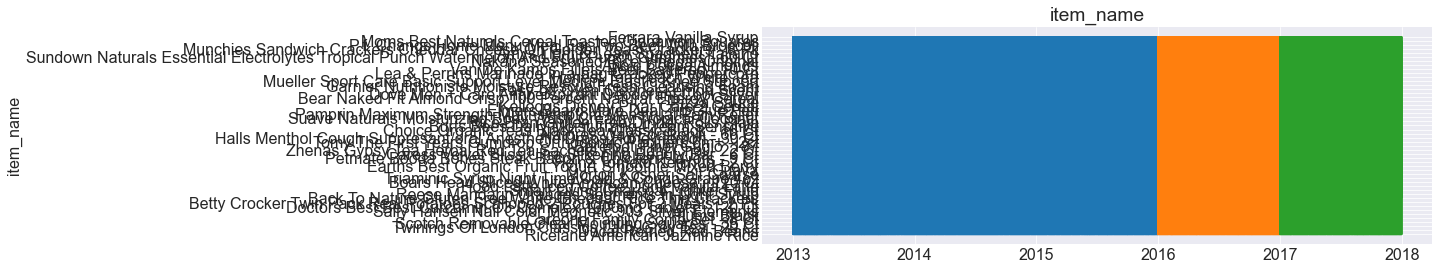

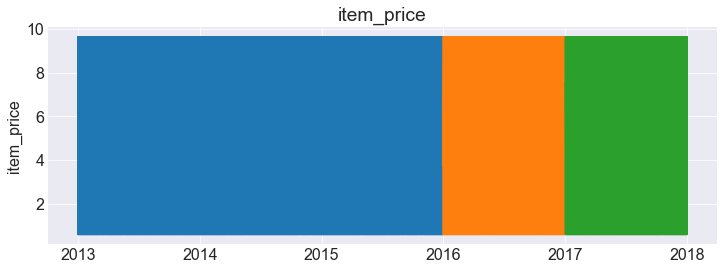

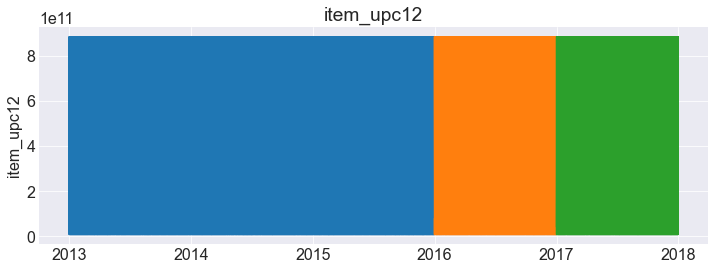

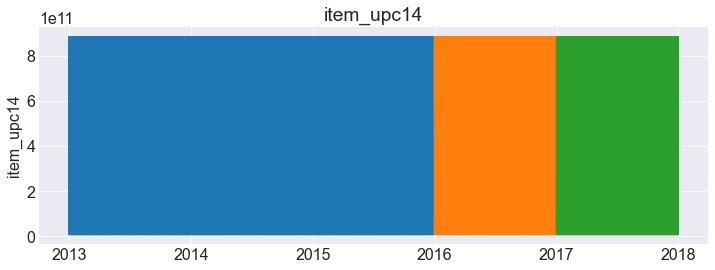

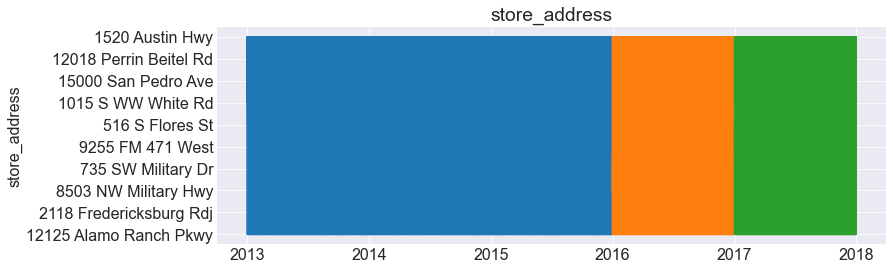

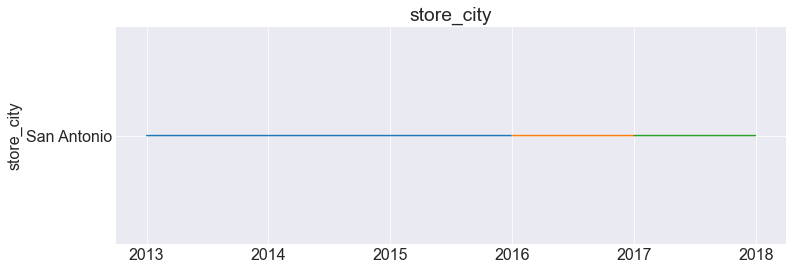

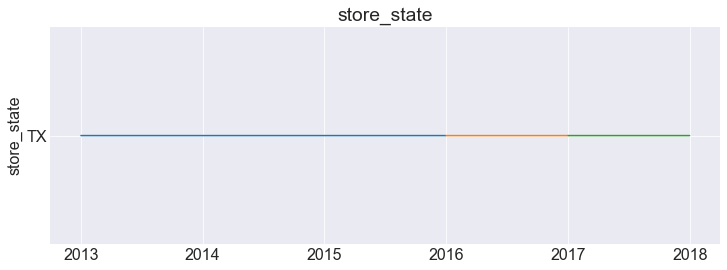

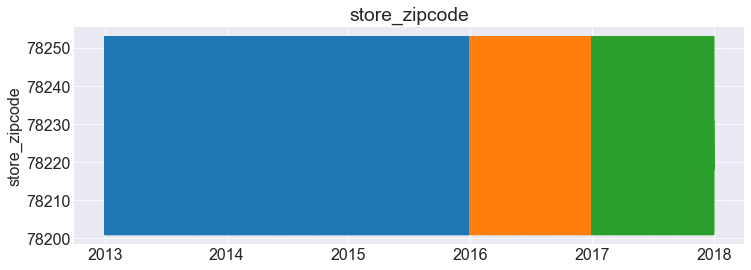

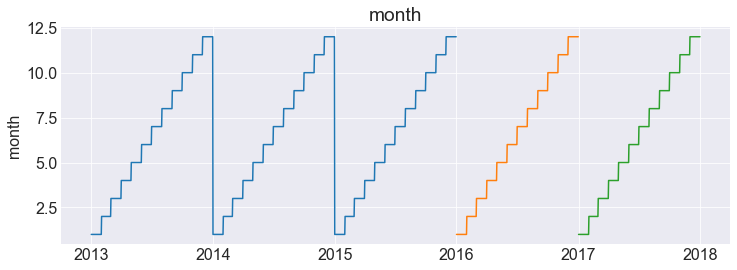

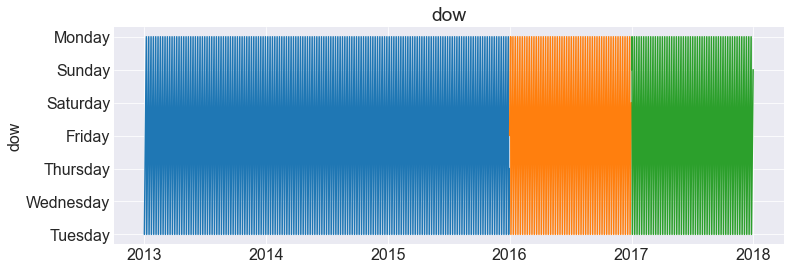

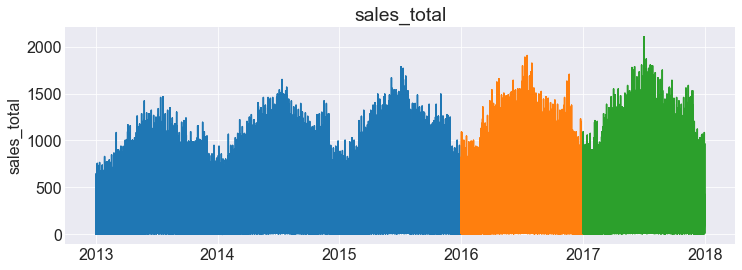

In [16]:
# visualize splits
for col in train.columns:
    plt.figure(figsize=(12,4))
    for sample in [train, validate, test]:
        plt.plot(sample[col])
    plt.title(col)
    plt.ylabel(col)
    plt.show()

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 547500 entries, 2013-01-01 to 2015-12-31
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_id        547500 non-null  int64  
 1   quantity       547500 non-null  float64
 2   sale_id        547500 non-null  int64  
 3   store_id       547500 non-null  int64  
 4   item_brand     547500 non-null  object 
 5   item_name      547500 non-null  object 
 6   item_price     547500 non-null  float64
 7   item_upc12     547500 non-null  int64  
 8   item_upc14     547500 non-null  int64  
 9   store_address  547500 non-null  object 
 10  store_city     547500 non-null  object 
 11  store_state    547500 non-null  object 
 12  store_zipcode  547500 non-null  int64  
 13  month          547500 non-null  int64  
 14  dow            547500 non-null  object 
 15  sales_total    547500 non-null  float64
dtypes: float64(3), int64(7), object(6)
memory usage: 87.1+ MB


In [18]:
cols=['item_id','sale_id','store_id','item_upc12','item_upc14','store_zipcode','month','quantity','sales_total']

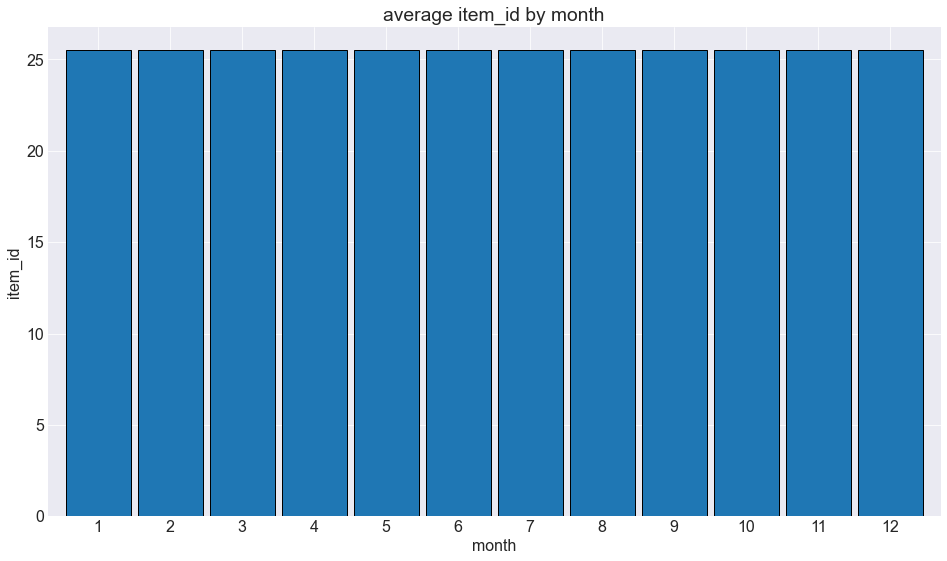

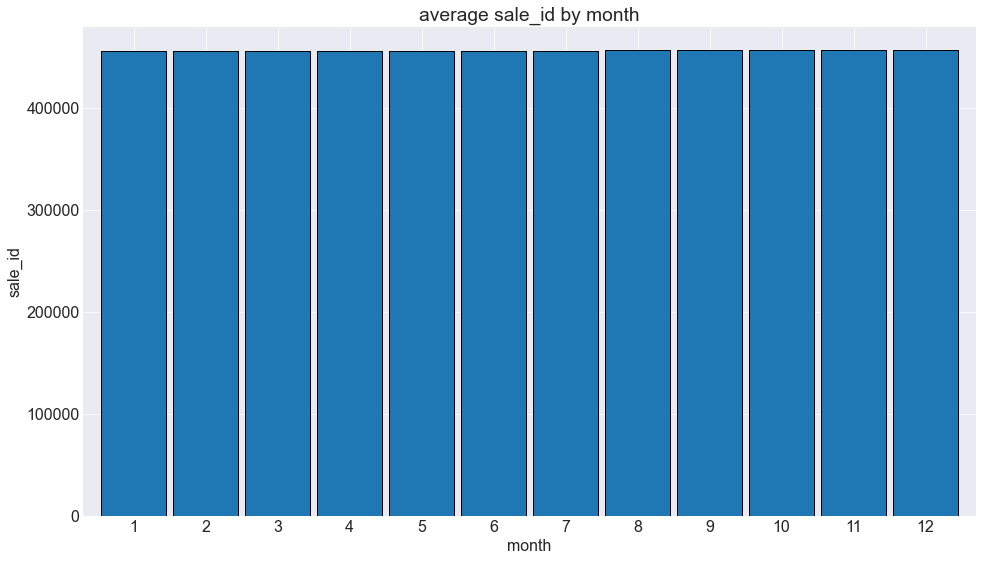

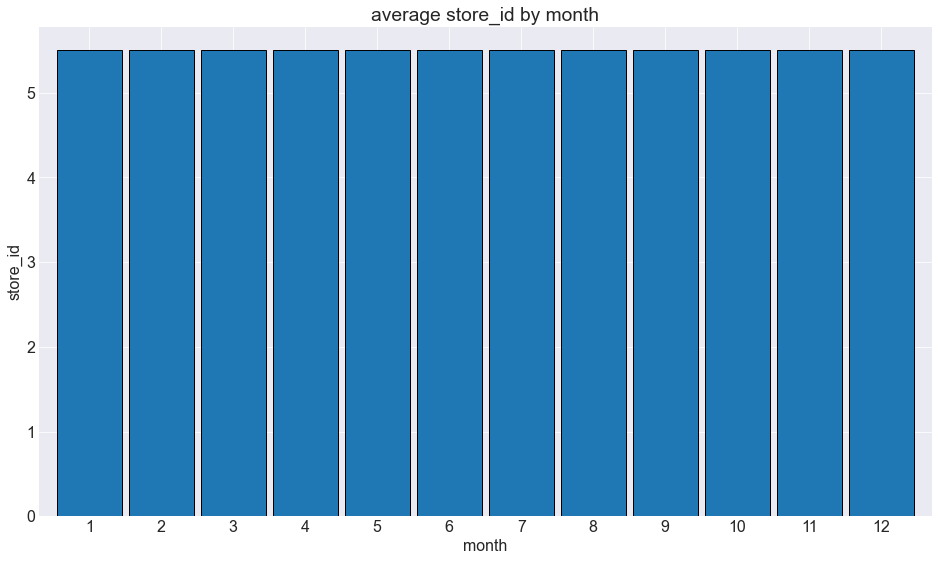

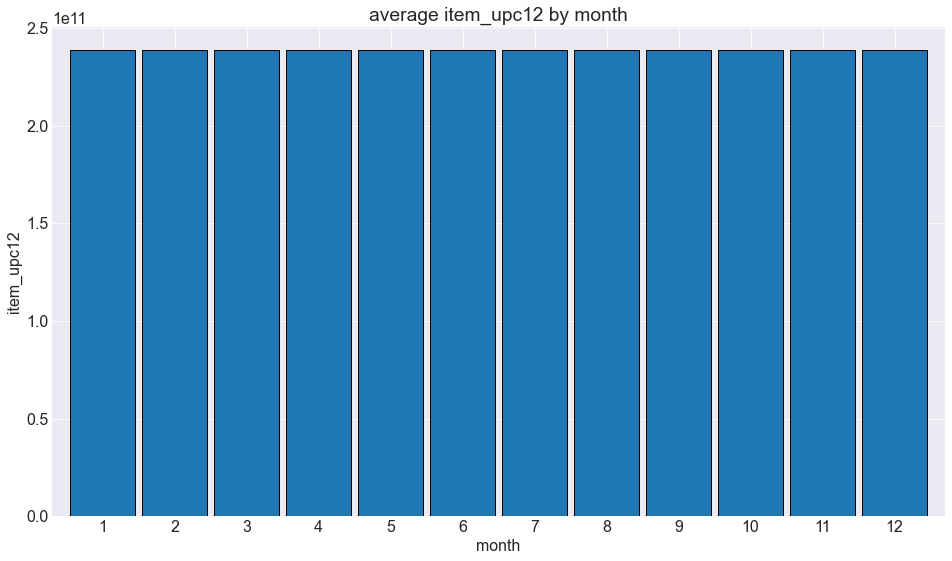

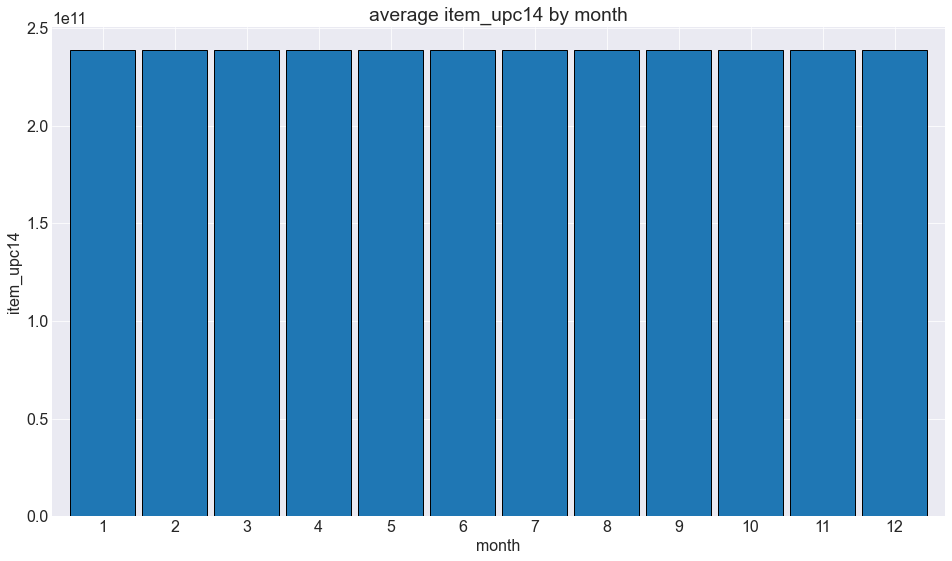

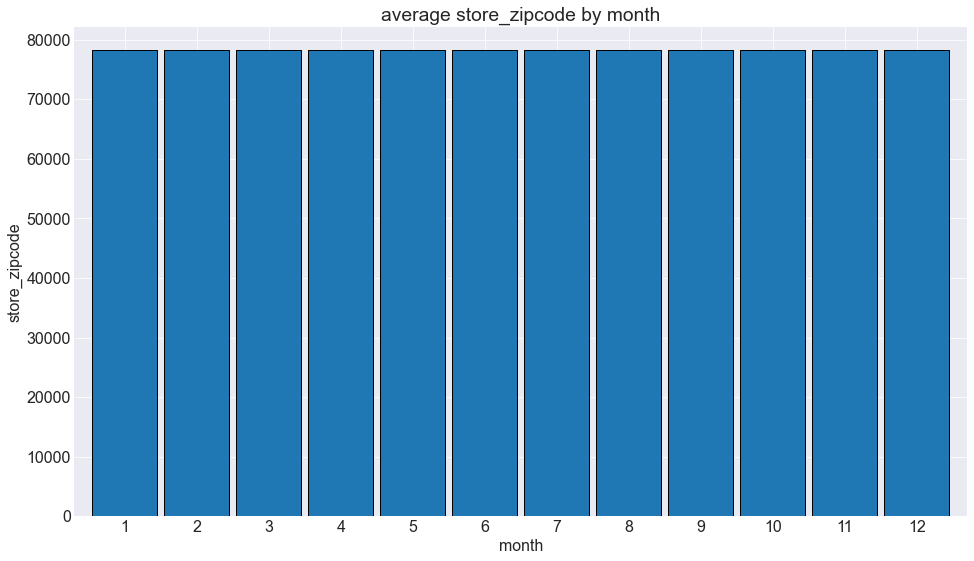

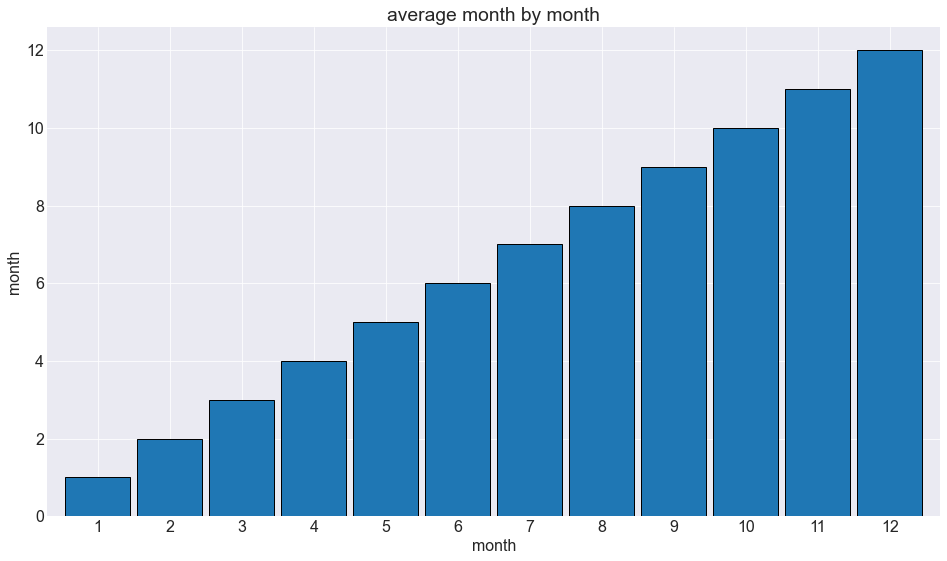

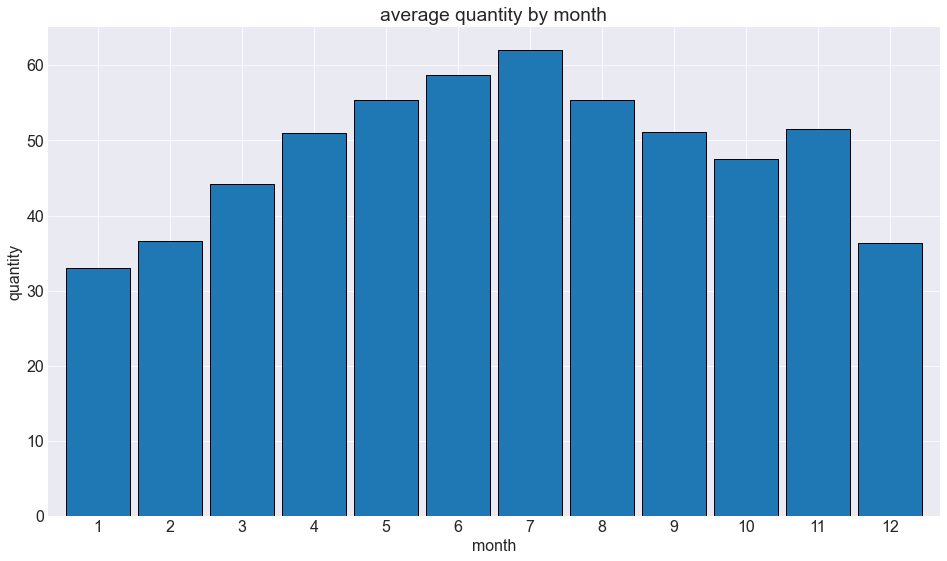

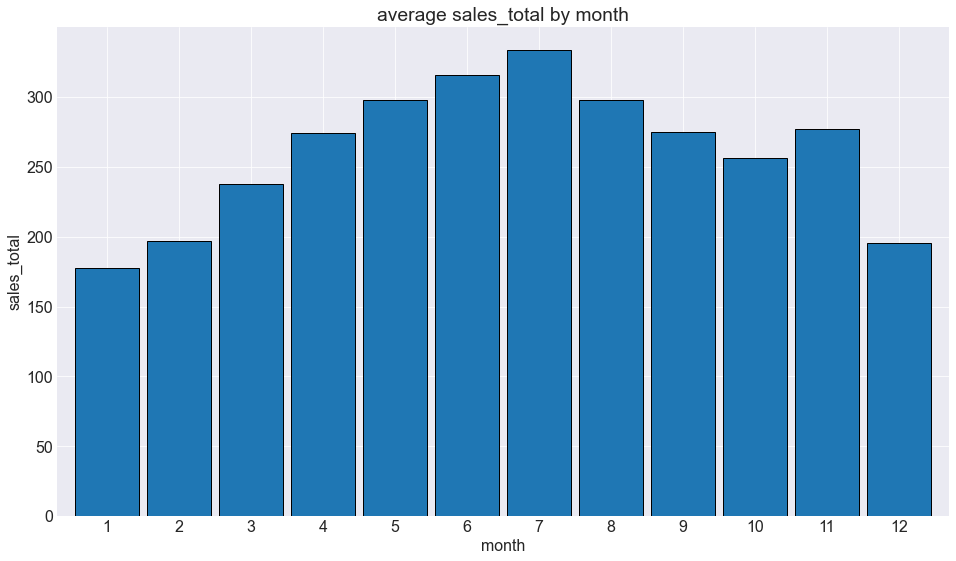

In [19]:
for col in cols:
    train[col].groupby(train.index.month).mean().plot.bar(rot=0, width=.9, ec='black')
    plt.xlabel('month')
    plt.ylabel(col)
    plt.title(f'average {col} by month')
    plt.show()

/var/folders/mk/w2hz4wxx7xn5hr_56wz536gh0000gn/T/ipykernel_15143/3476962323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['weekday'] = train.index.weekday.astype(str) + '-' + train.index.strftime('%a')


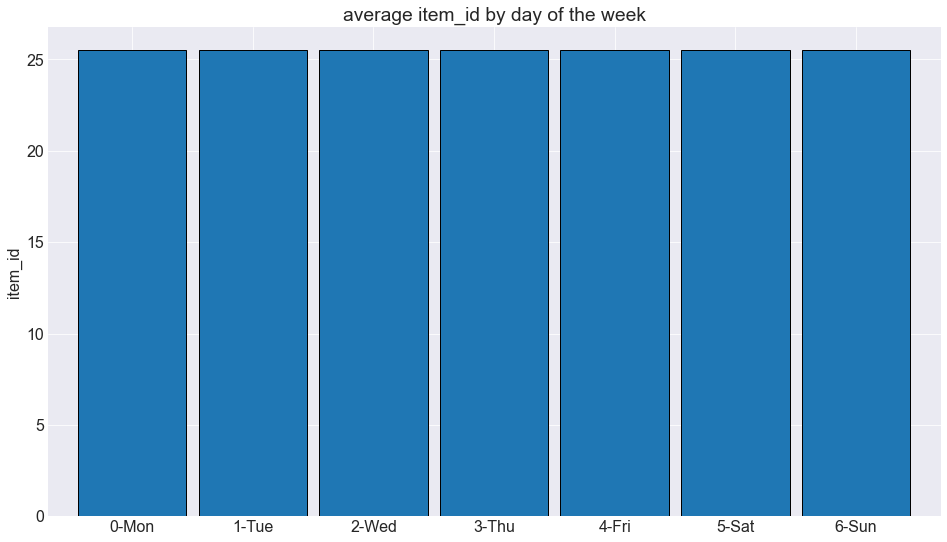

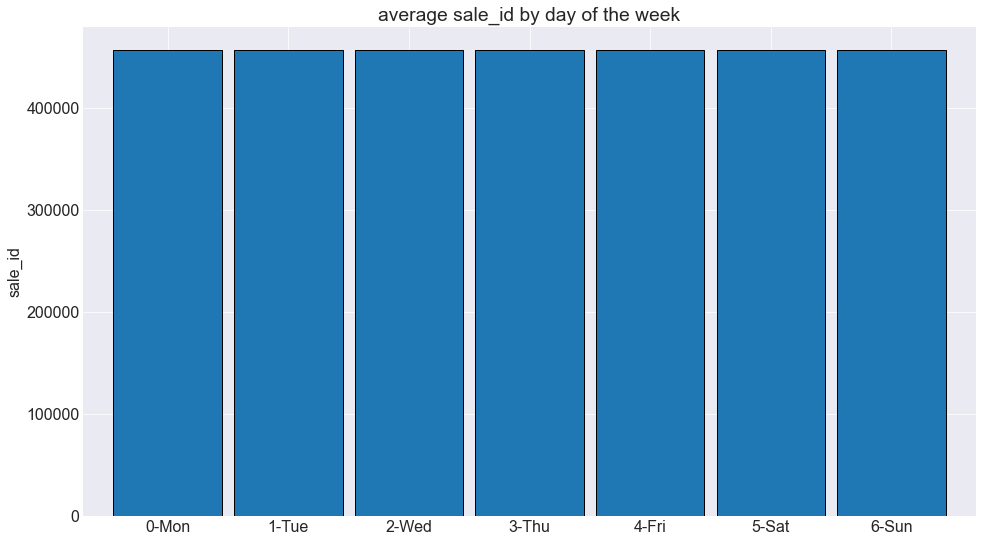

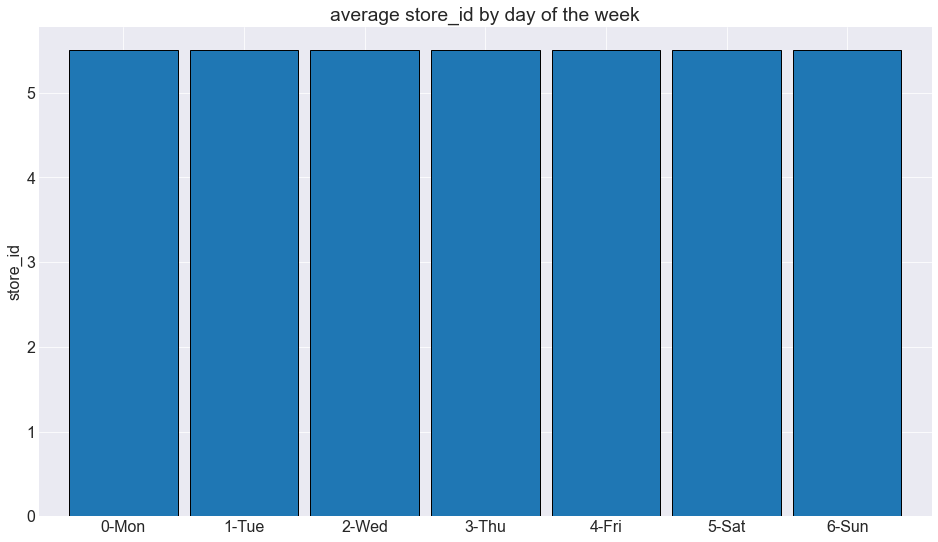

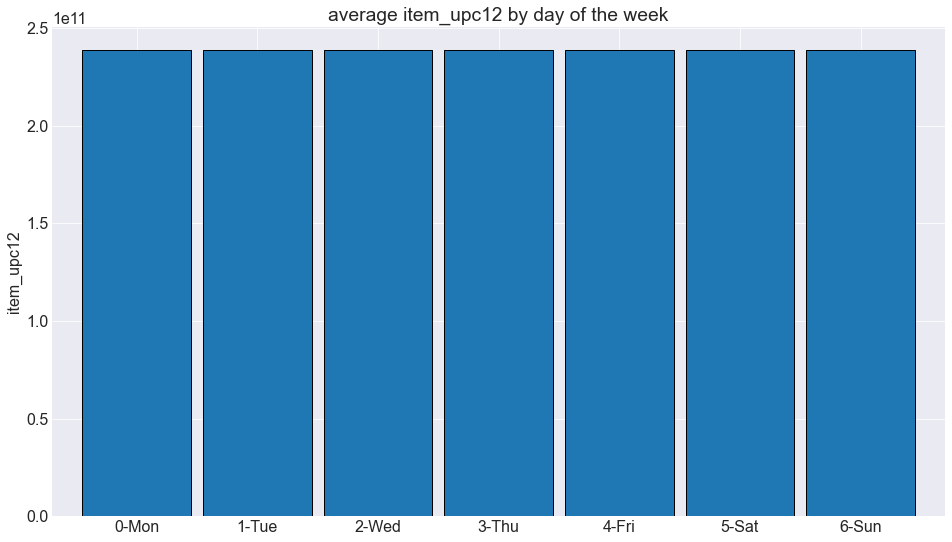

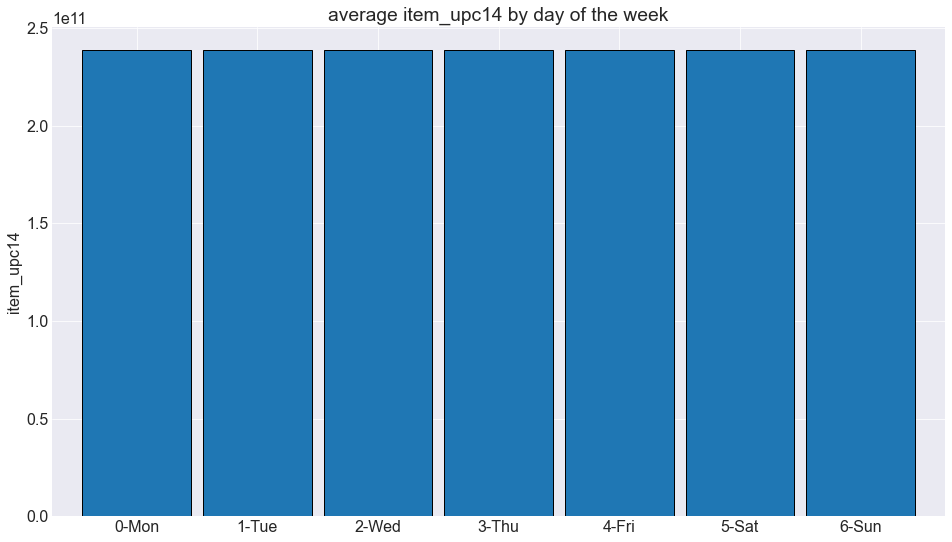

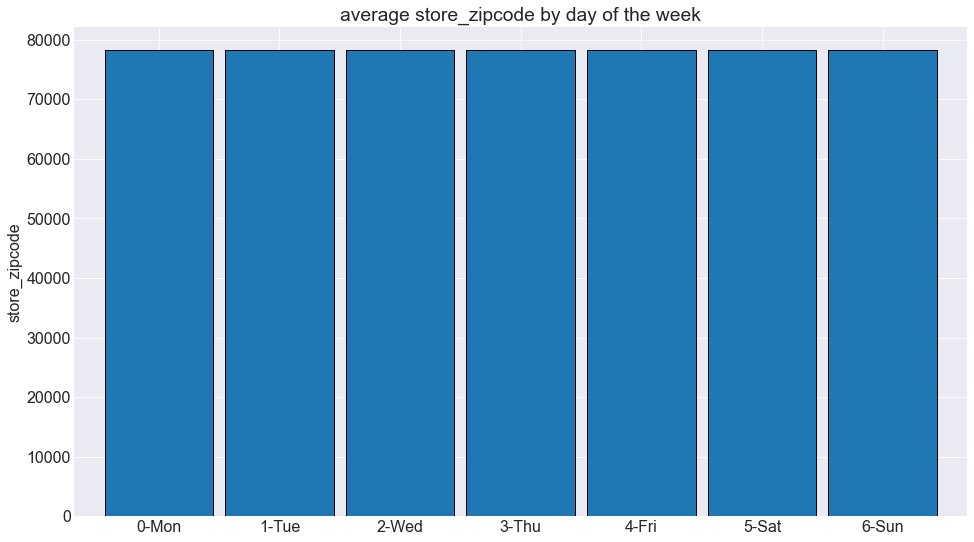

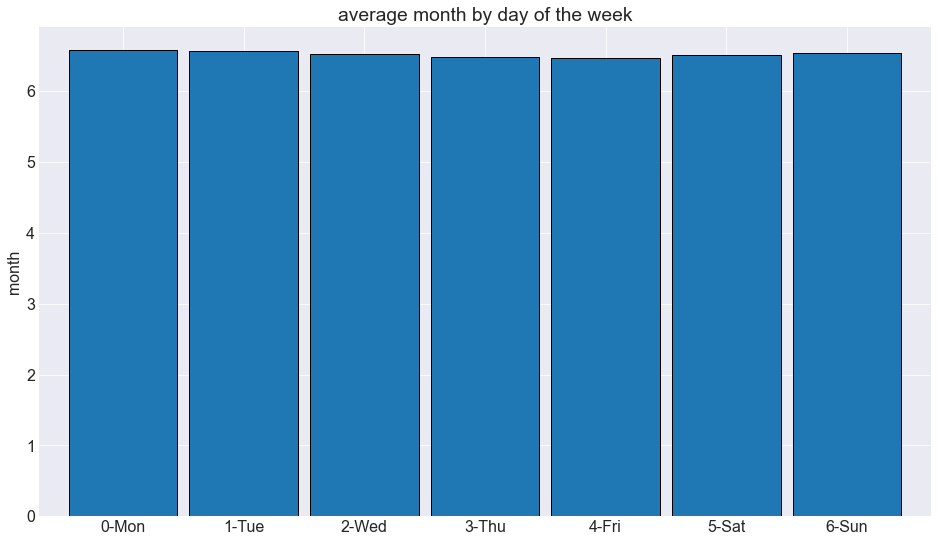

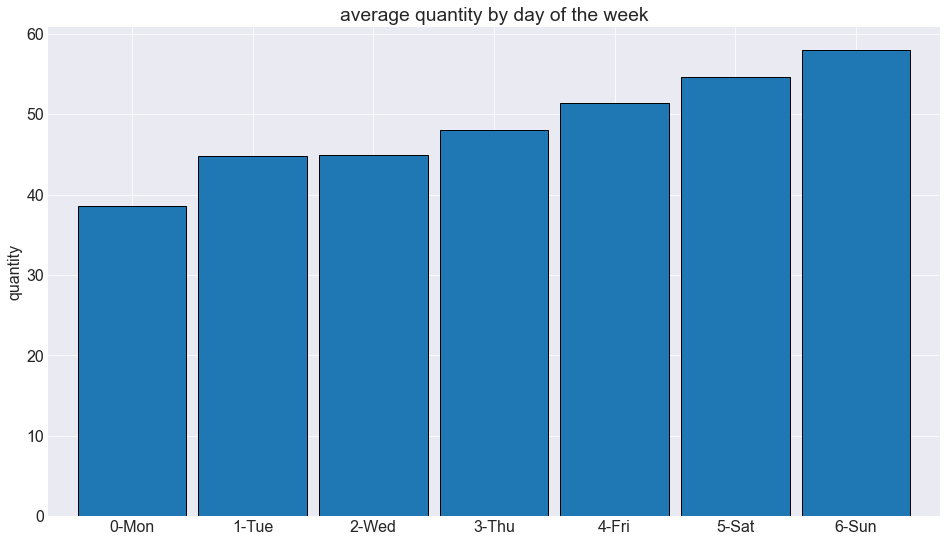

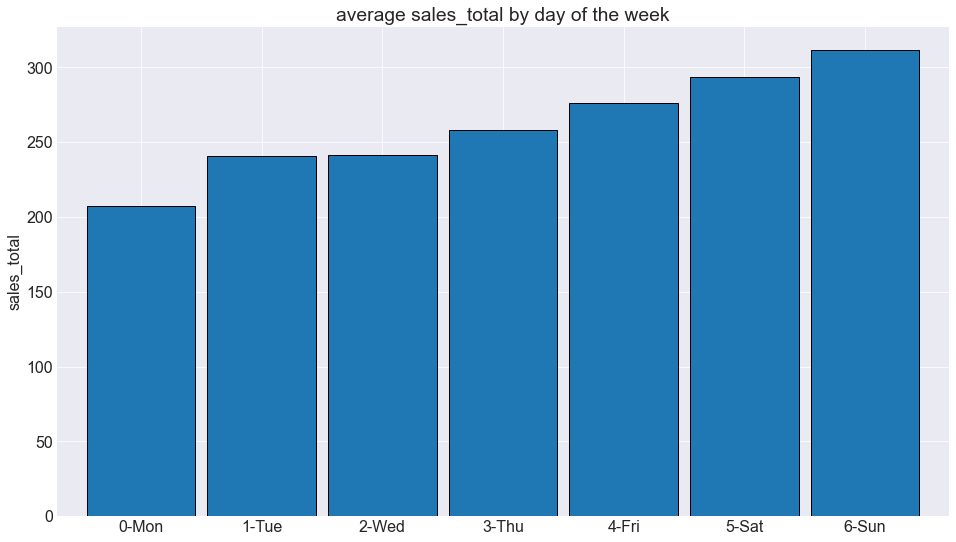

In [20]:
train['weekday'] = train.index.weekday.astype(str) + '-' + train.index.strftime('%a')
for col in cols:
    train.groupby('weekday')[col].mean().plot.bar(rot=0, width=.9, ec='black')
    plt.xlabel(None)
    plt.ylabel(col)
    plt.title(f'average {col} by day of the week')
    plt.show()
train = train.drop(columns='weekday')

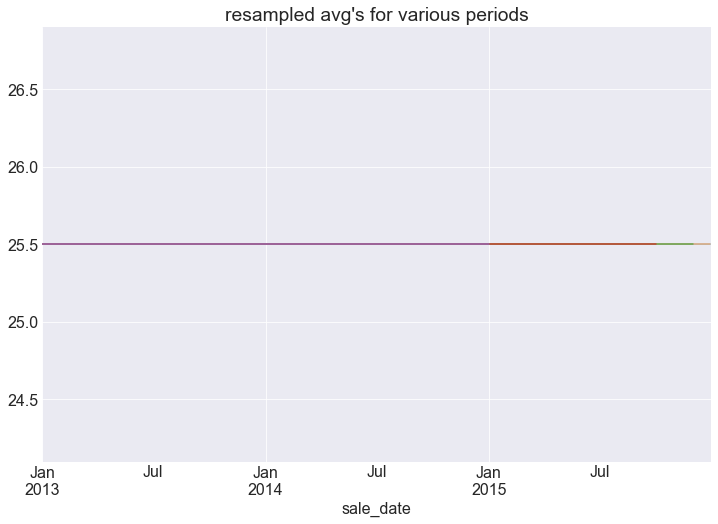

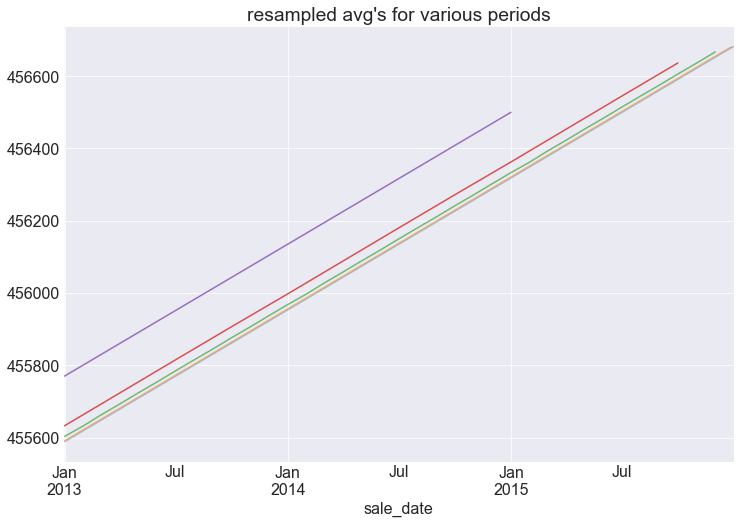

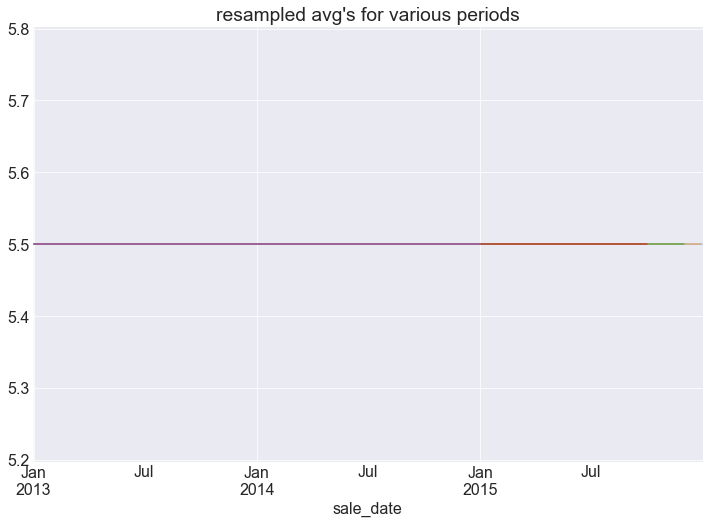

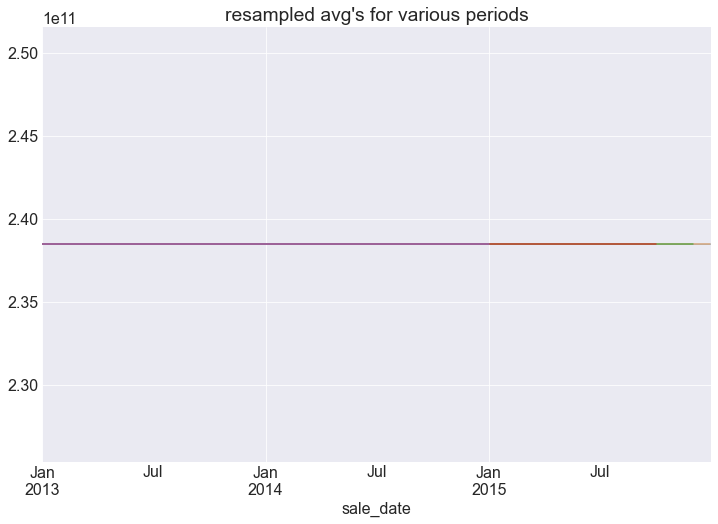

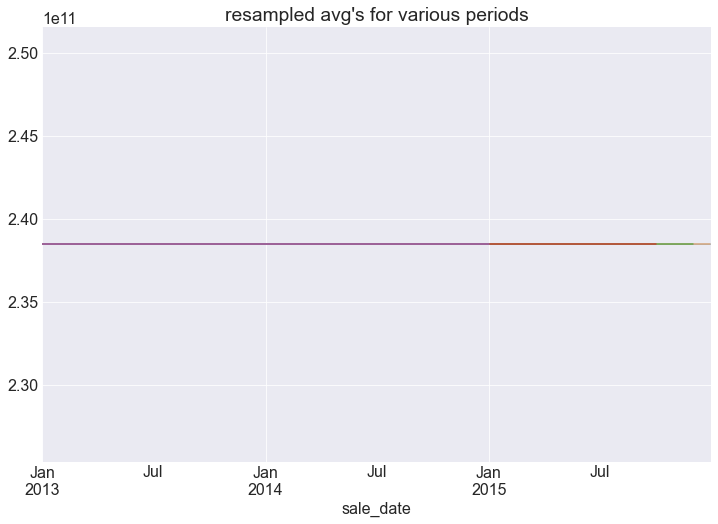

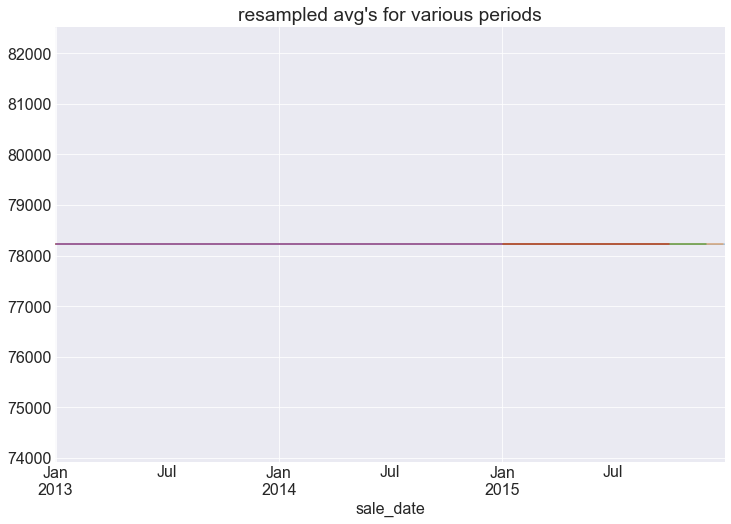

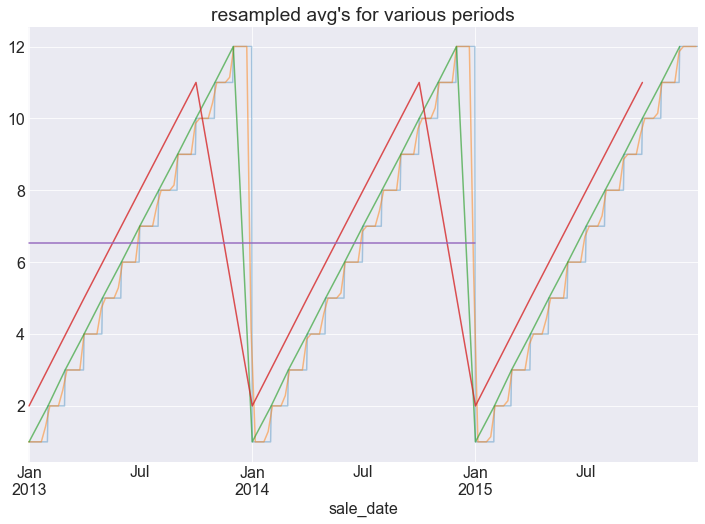

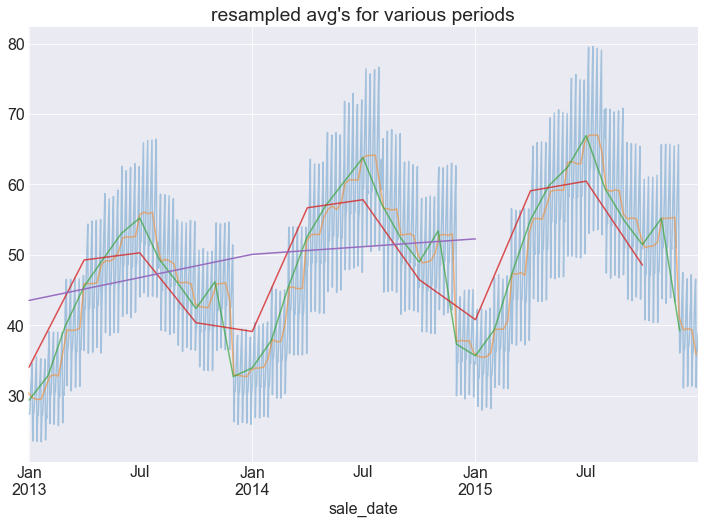

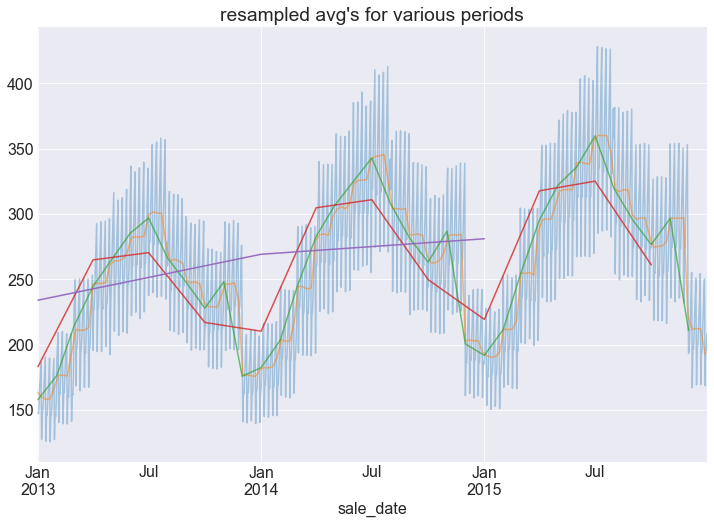

In [21]:
periods = ['D', 'W', 'M','Q', 'Y']
for col in cols:
    plt.figure(figsize=(12,8))
    plt.title('resampled avg\'s for various periods')
    alpha = .2
    for per in periods:
        alpha += .15
        train[col].resample(per).mean().plot(alpha=alpha) 
    plt.show()

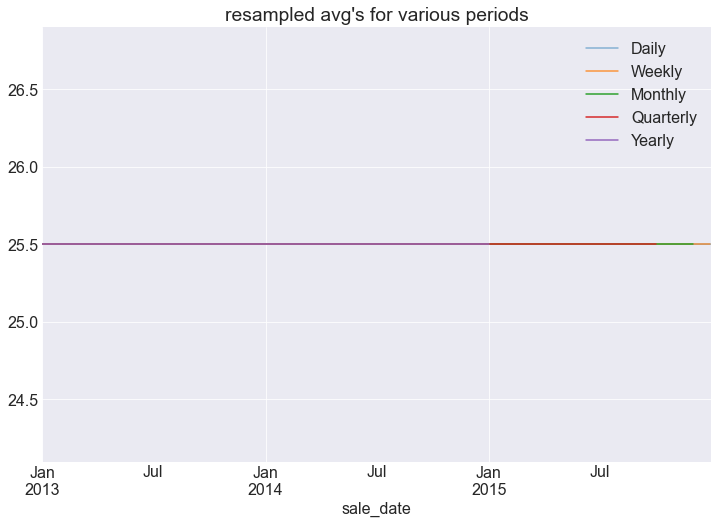

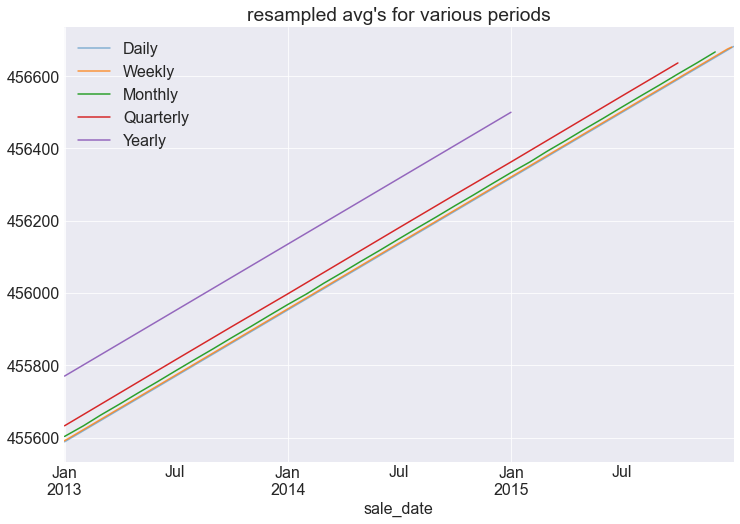

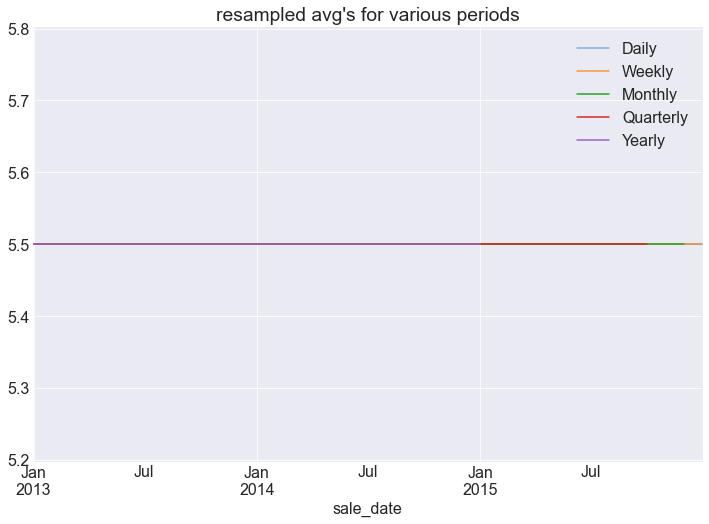

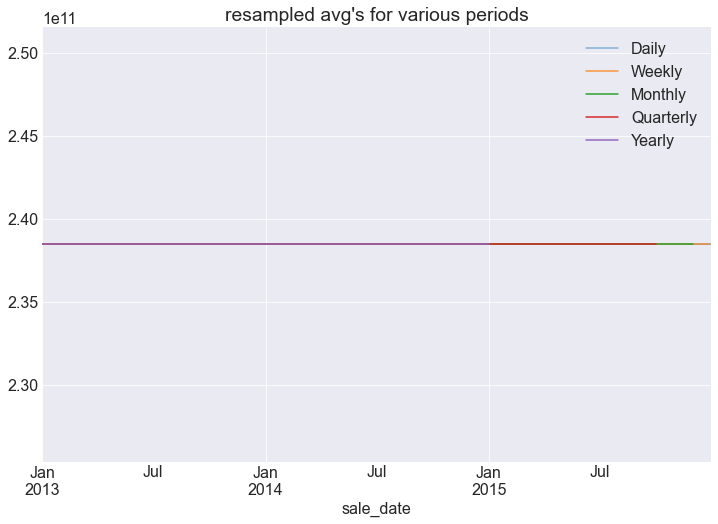

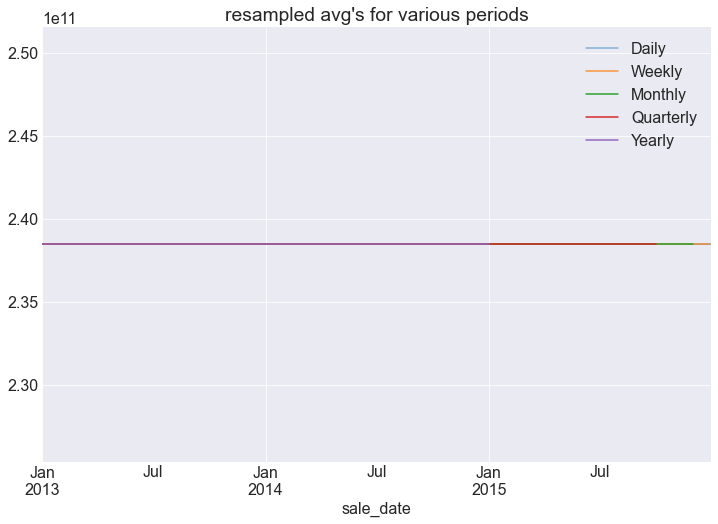

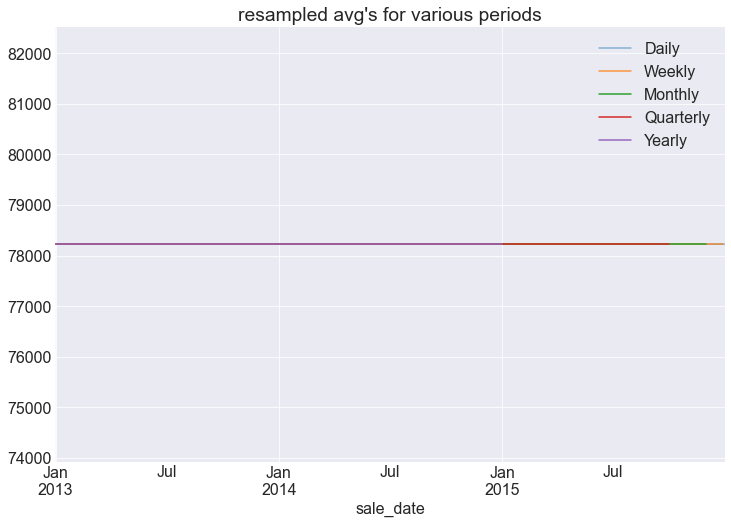

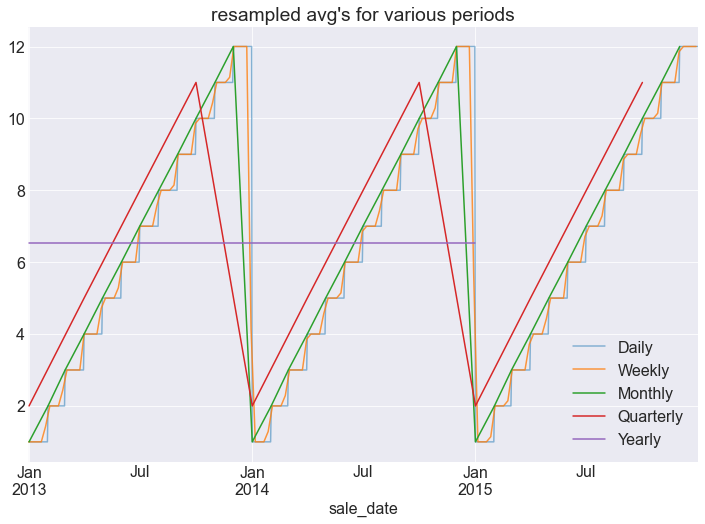

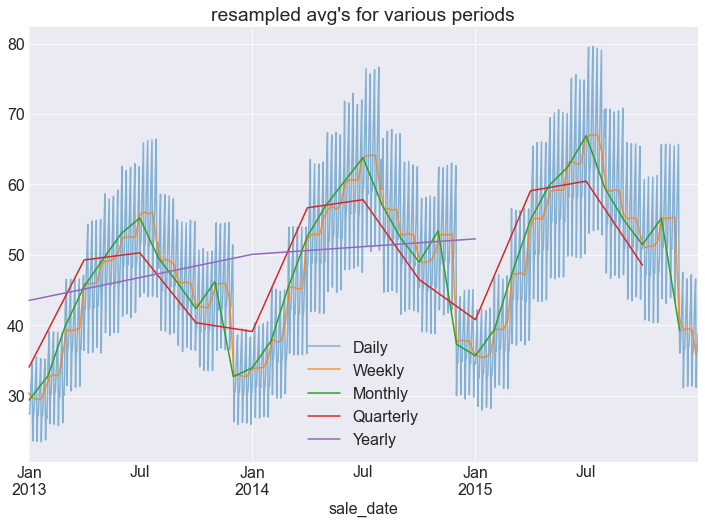

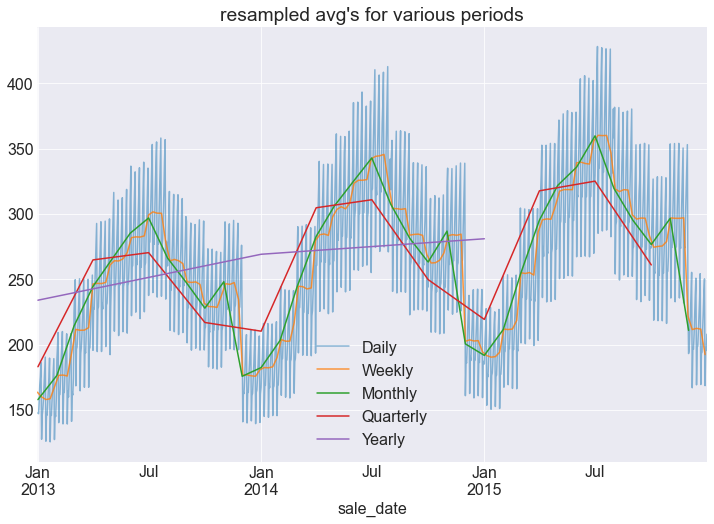

In [22]:
for col in cols:
    plt.figure(figsize=(12,8))
    train[col].resample('D').mean().plot(alpha=.5, label='Daily')
    train[col].resample('W').mean().plot(alpha=.8, label='Weekly')
    train[col].resample('M').mean().plot(label='Monthly')
    train[col].resample('Q').mean().plot(label='Quarterly')
    train[col].resample('Y').mean().plot(label='Yearly')
    plt.legend()
    plt.title('resampled avg\'s for various periods')
    plt.show()

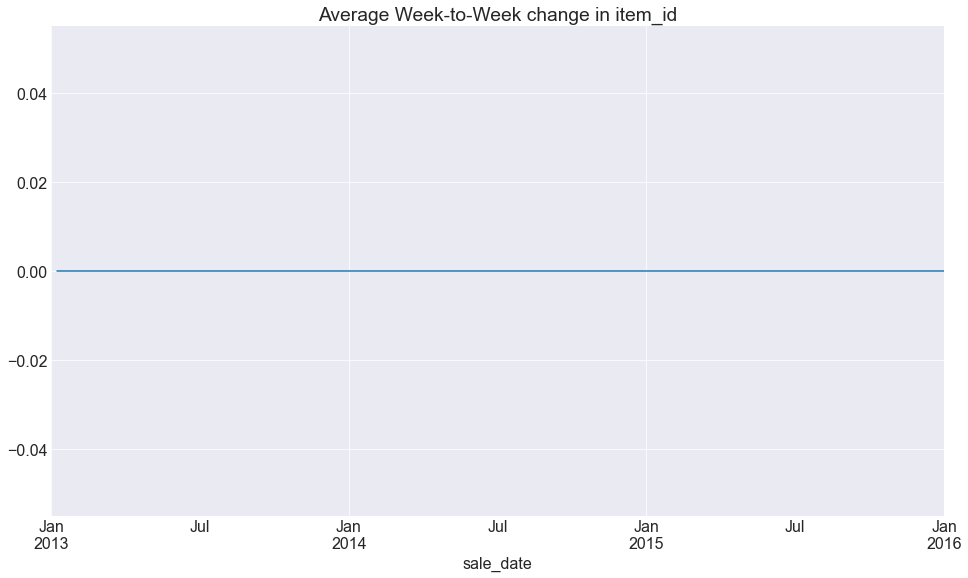

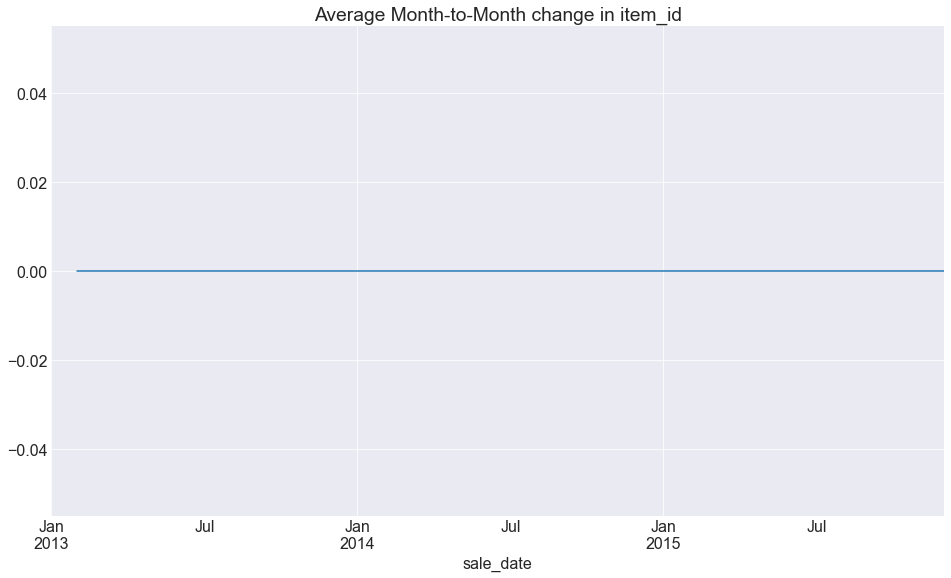

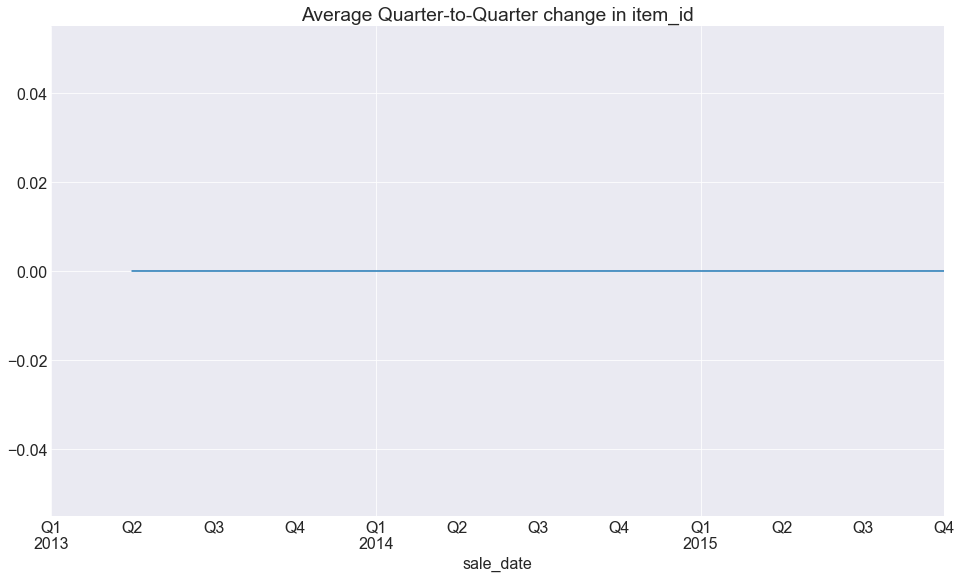

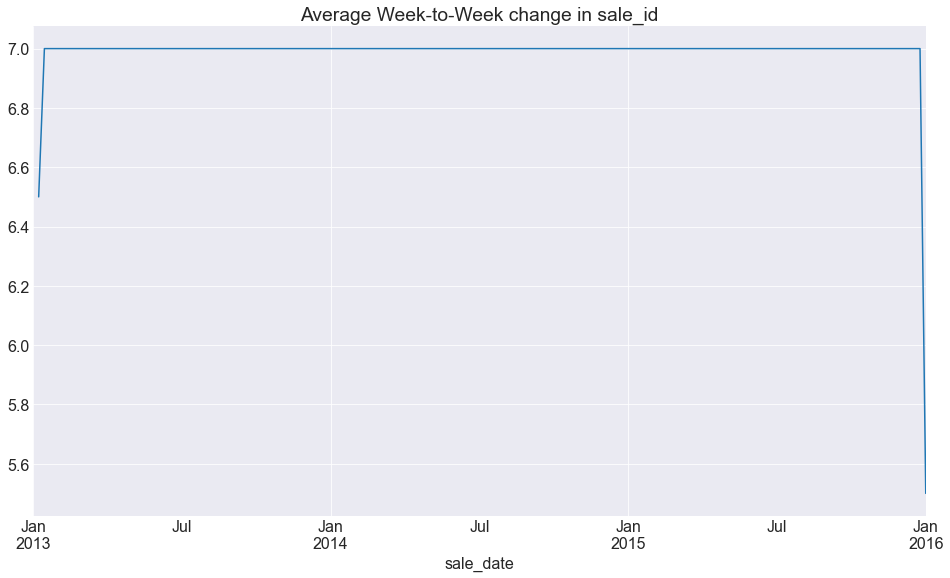

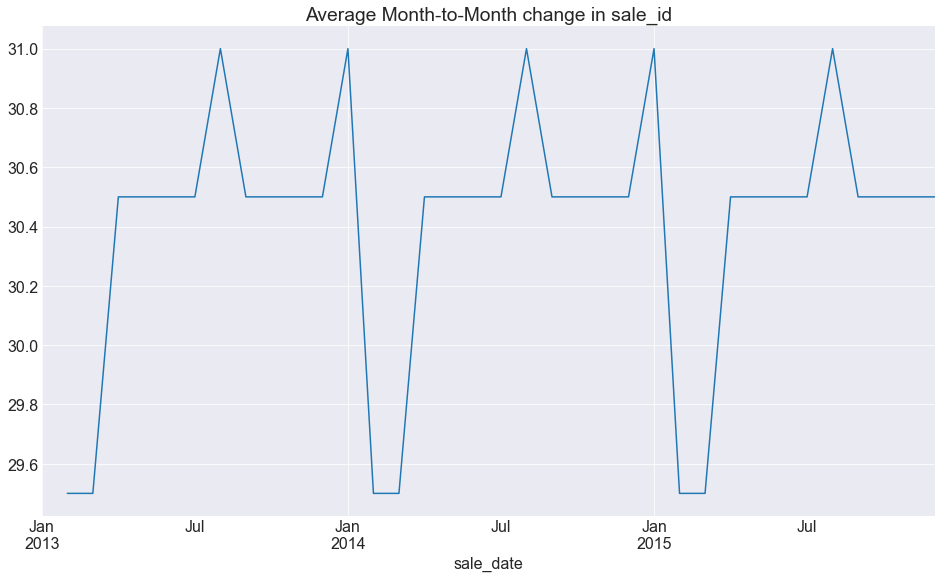

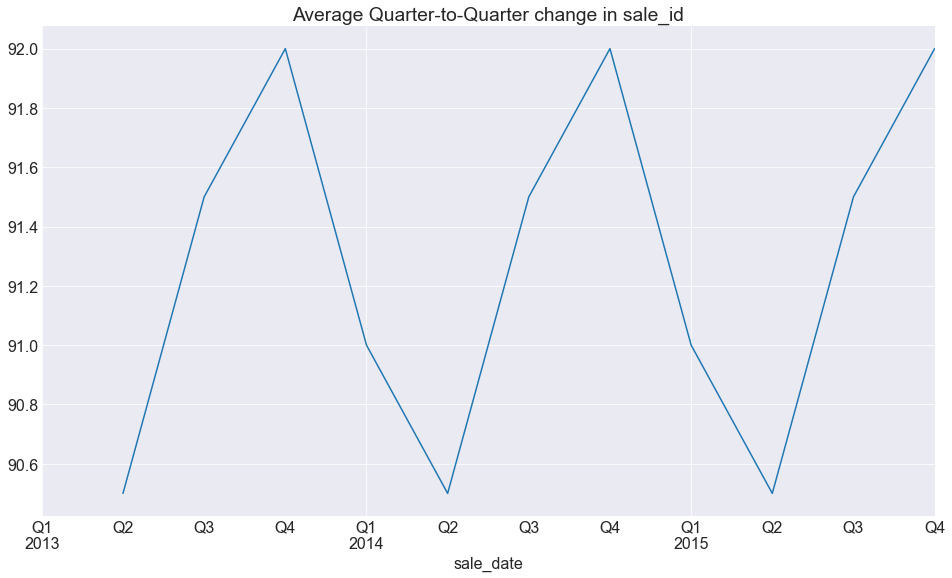

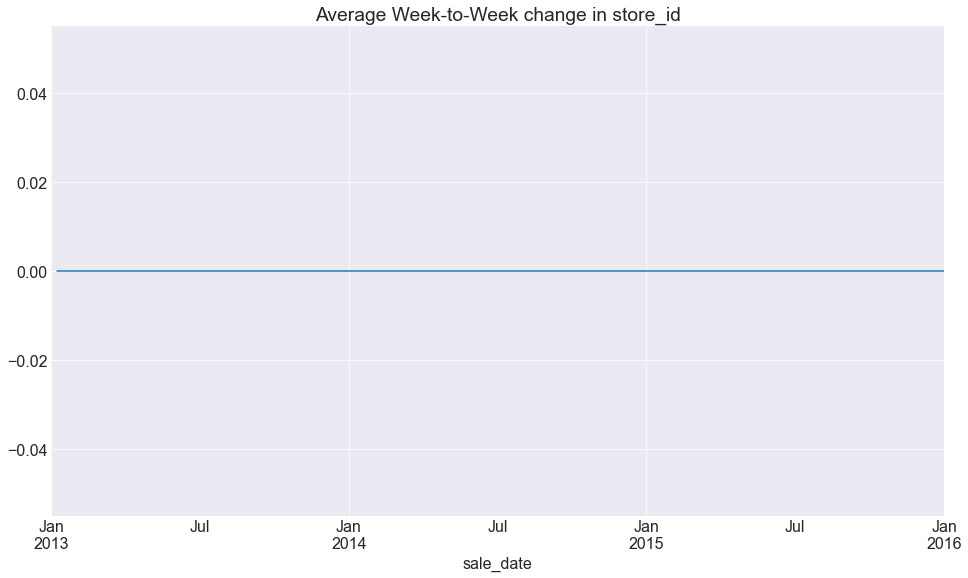

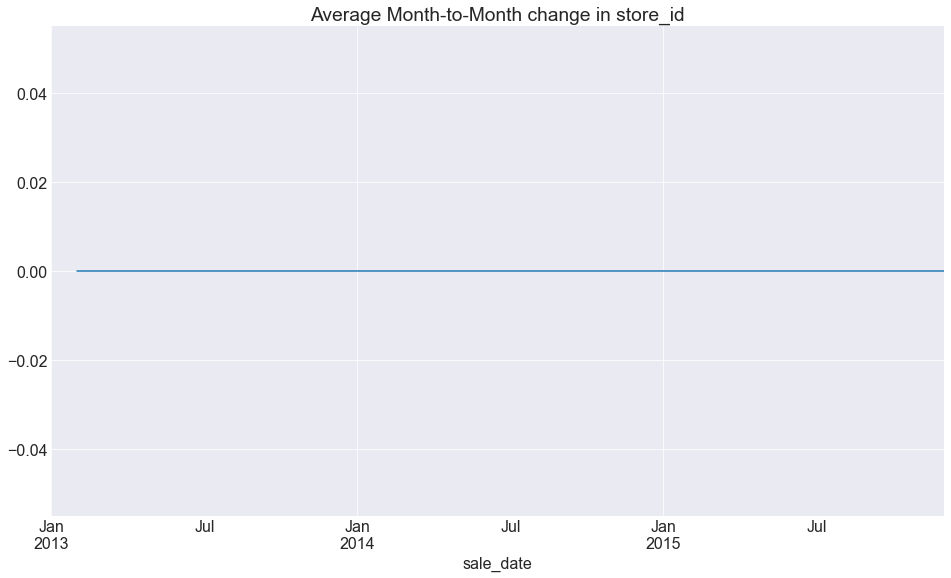

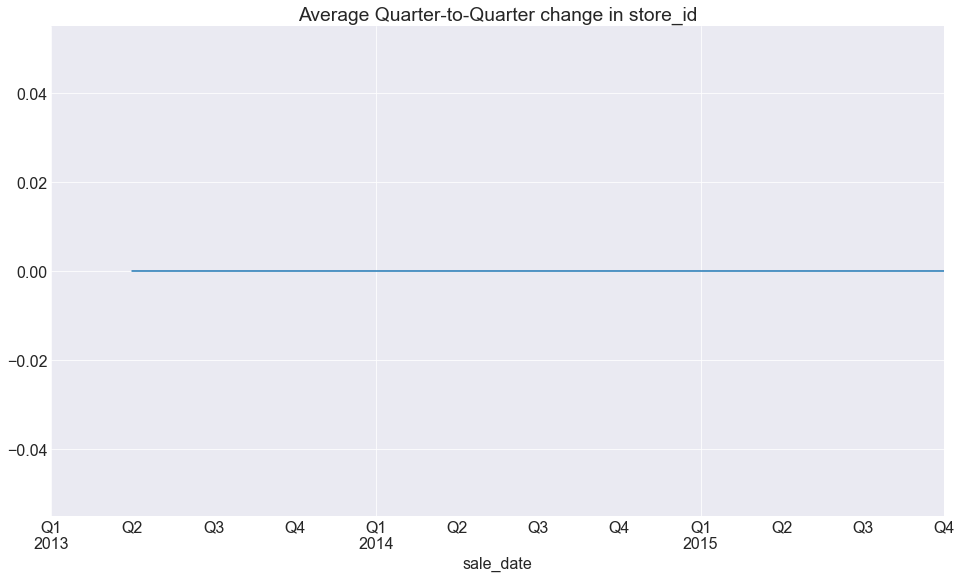

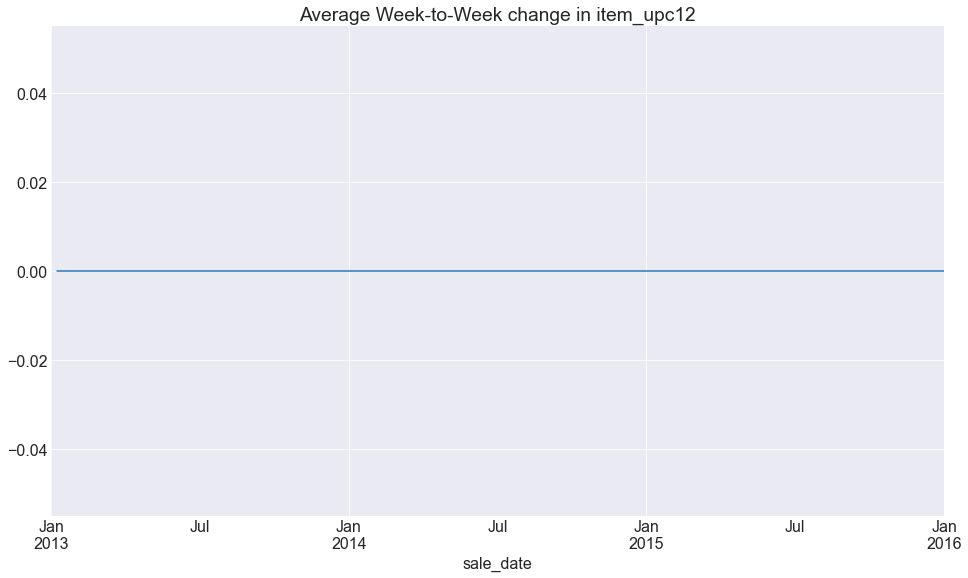

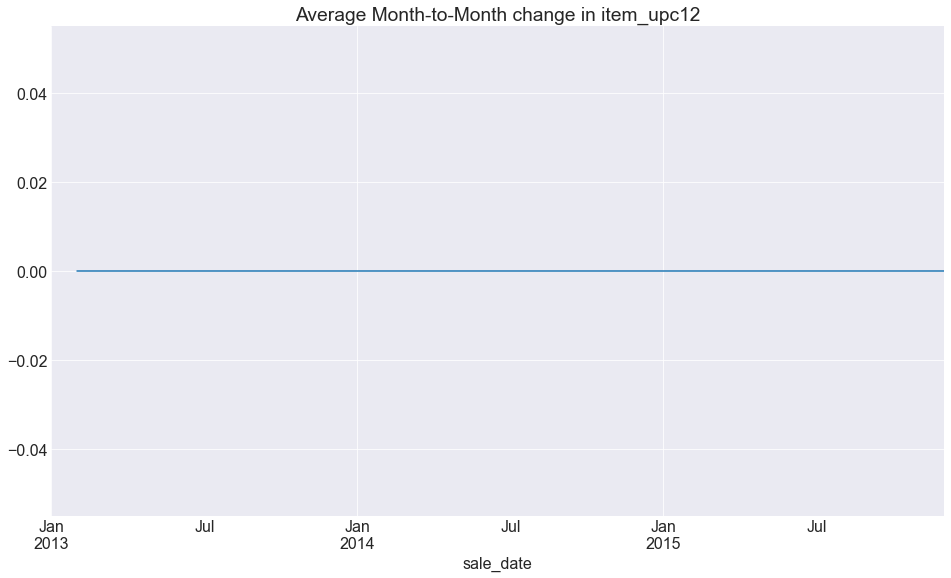

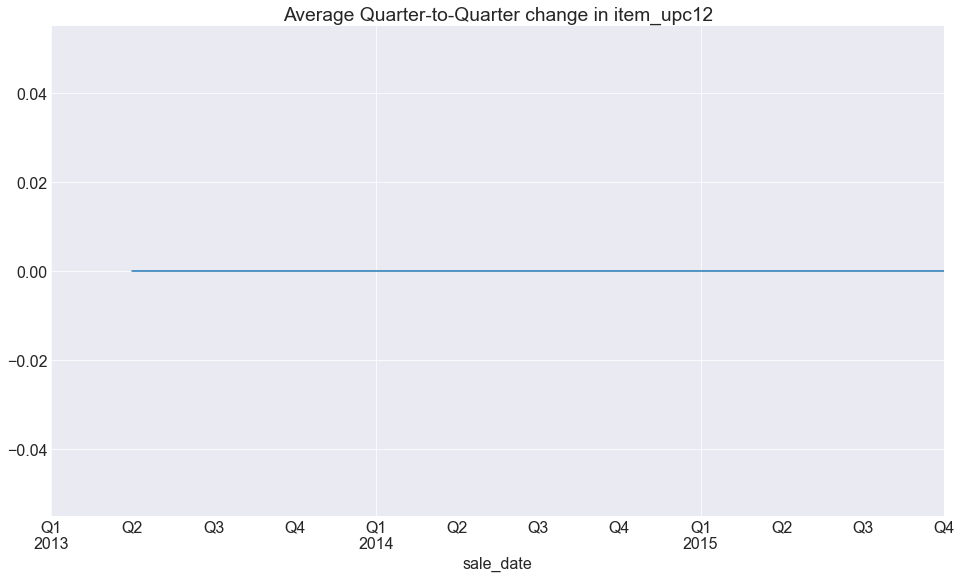

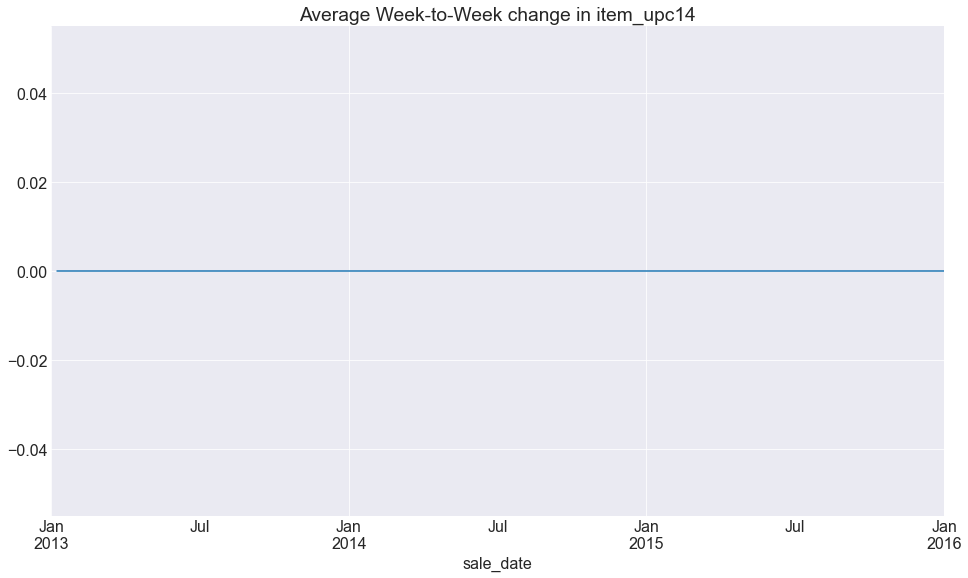

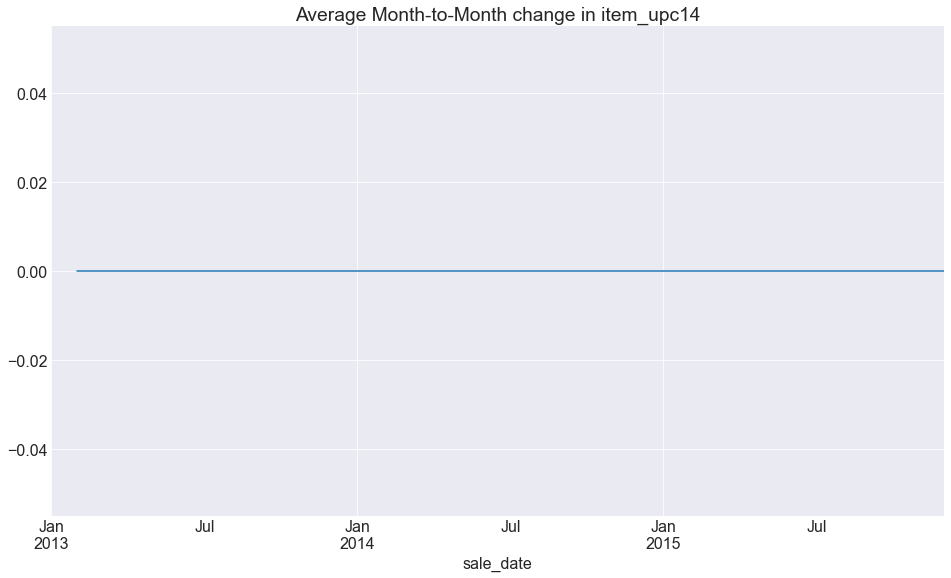

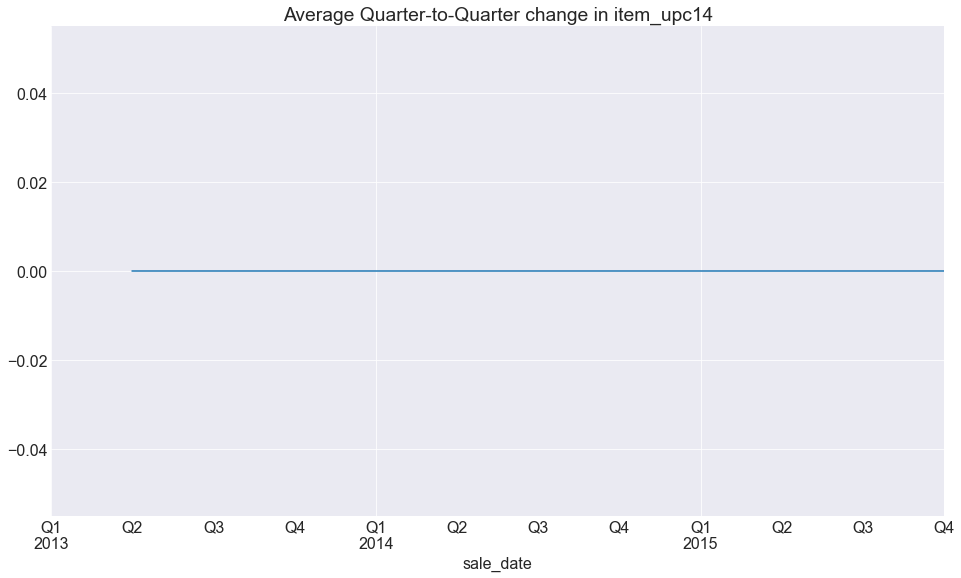

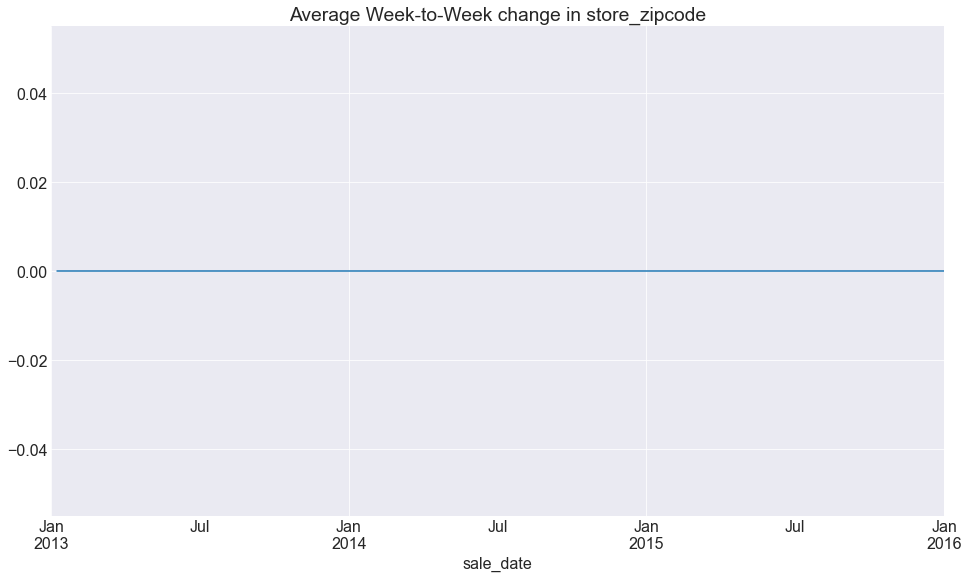

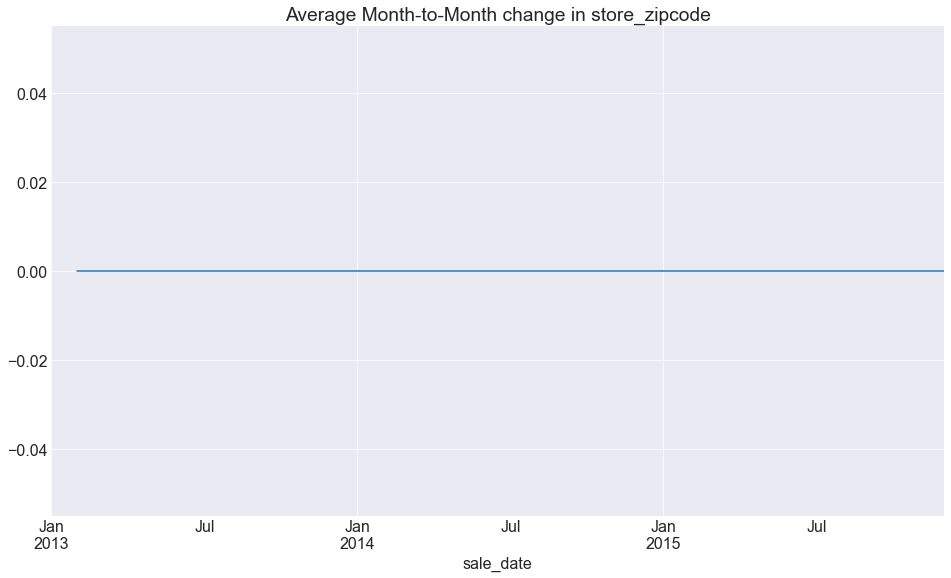

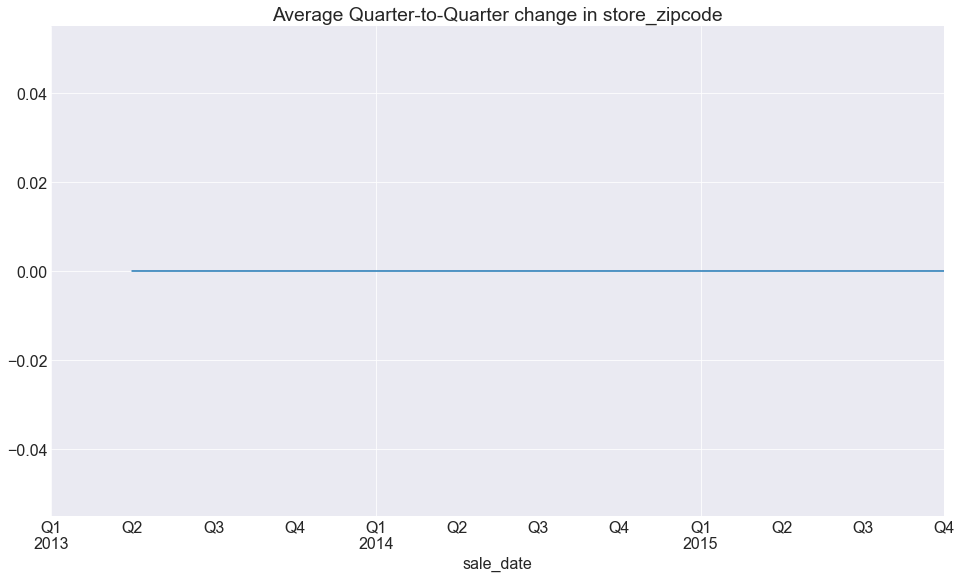

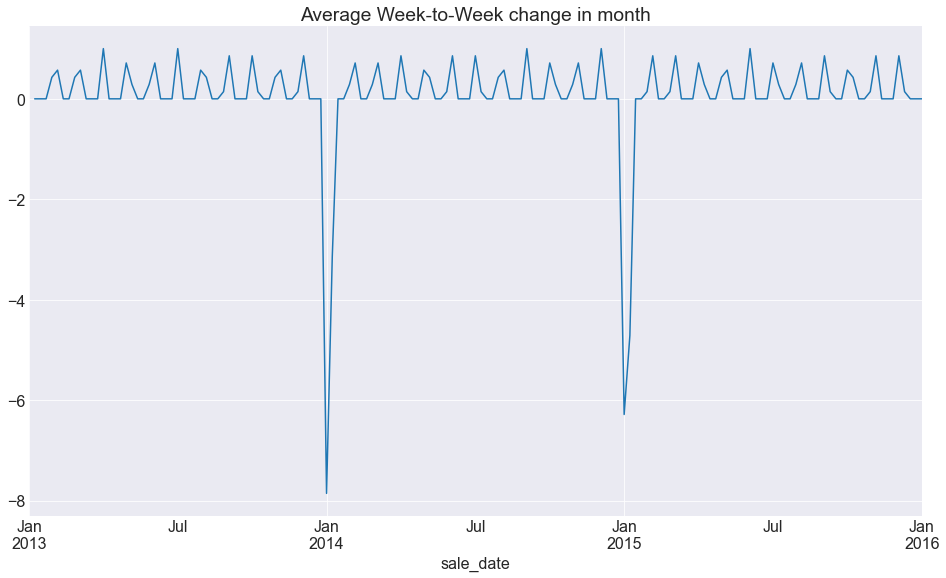

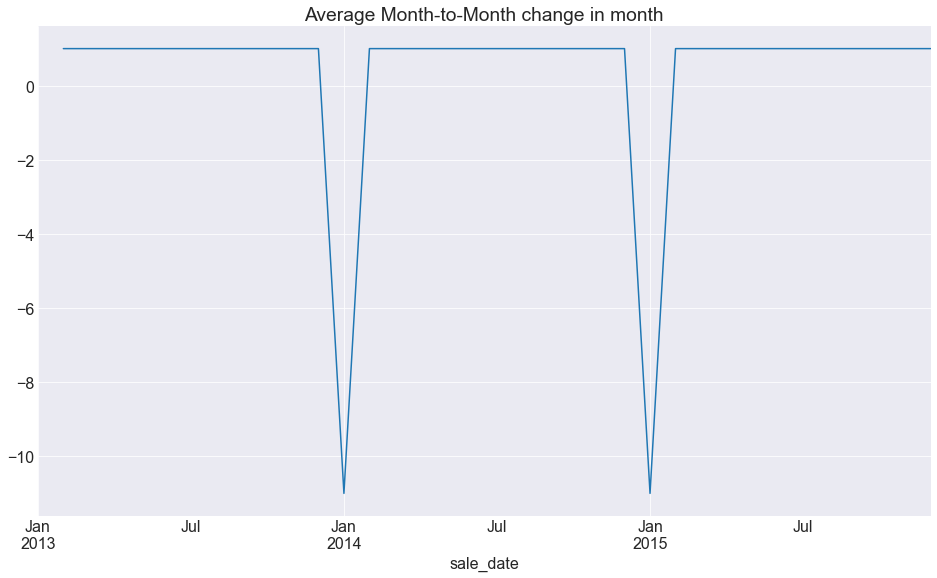

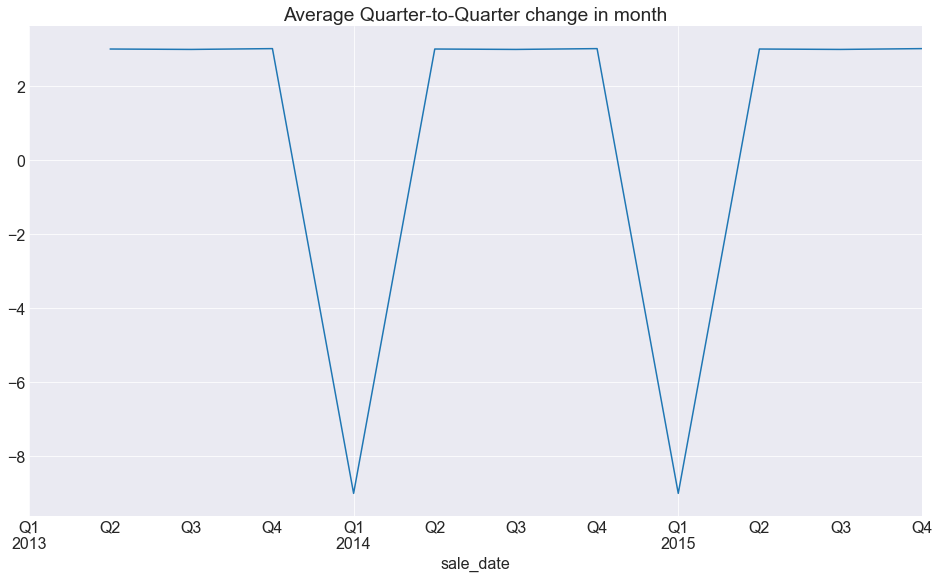

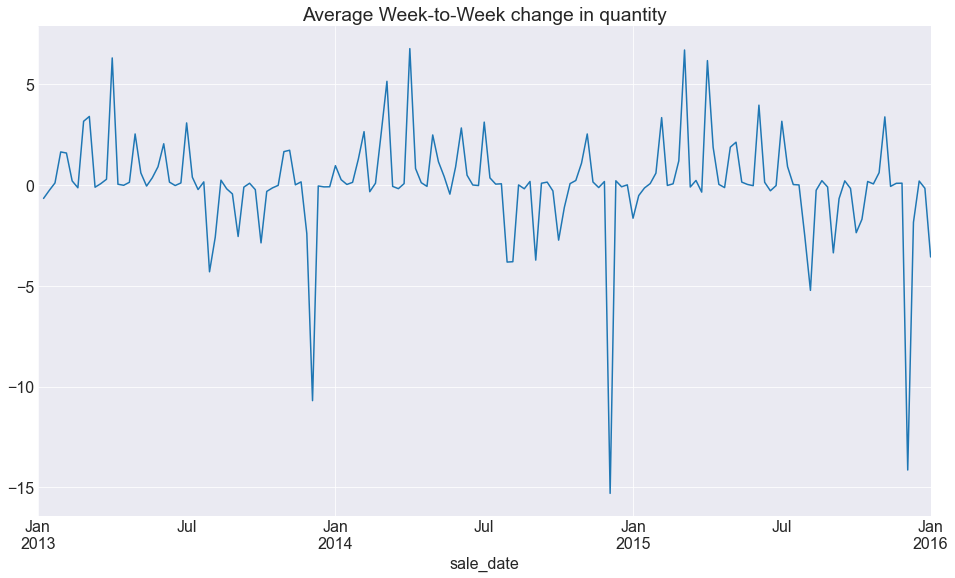

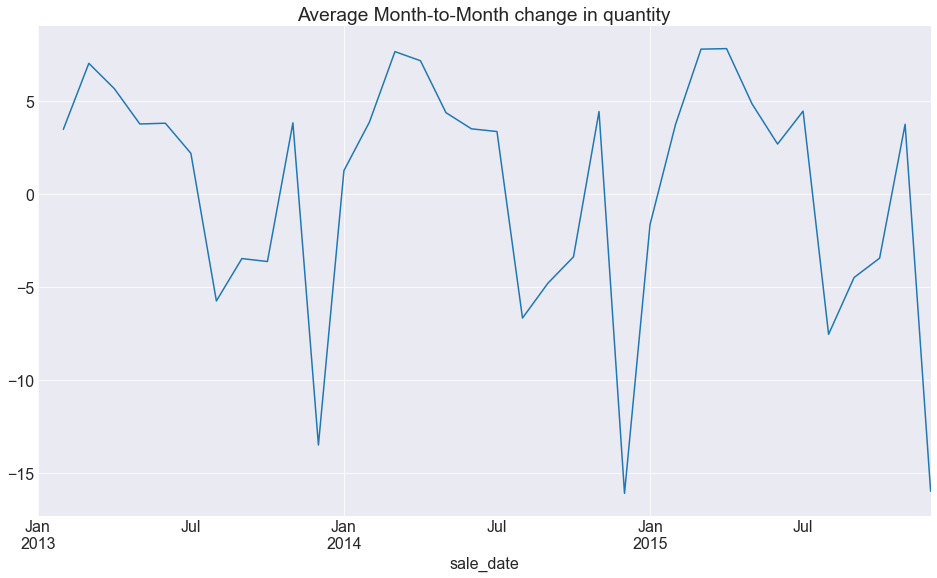

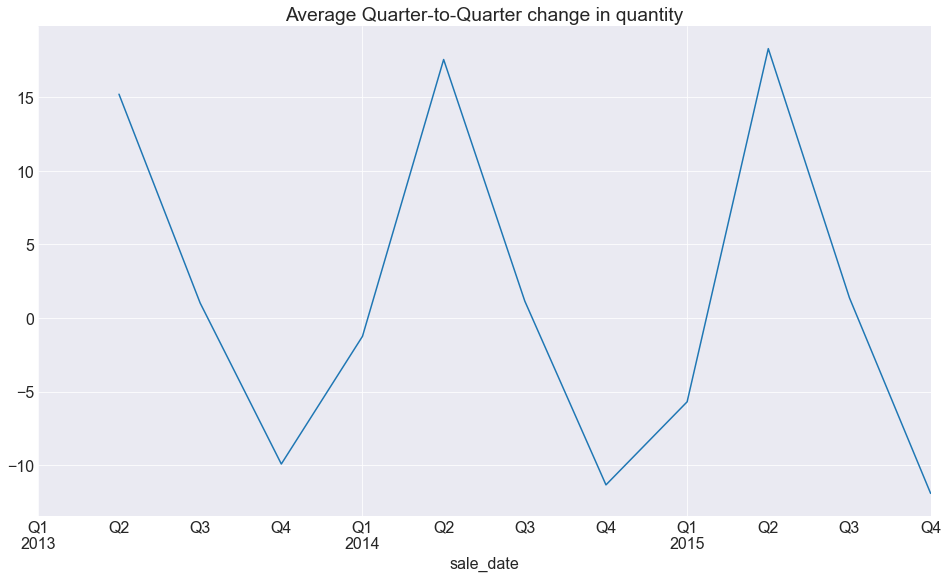

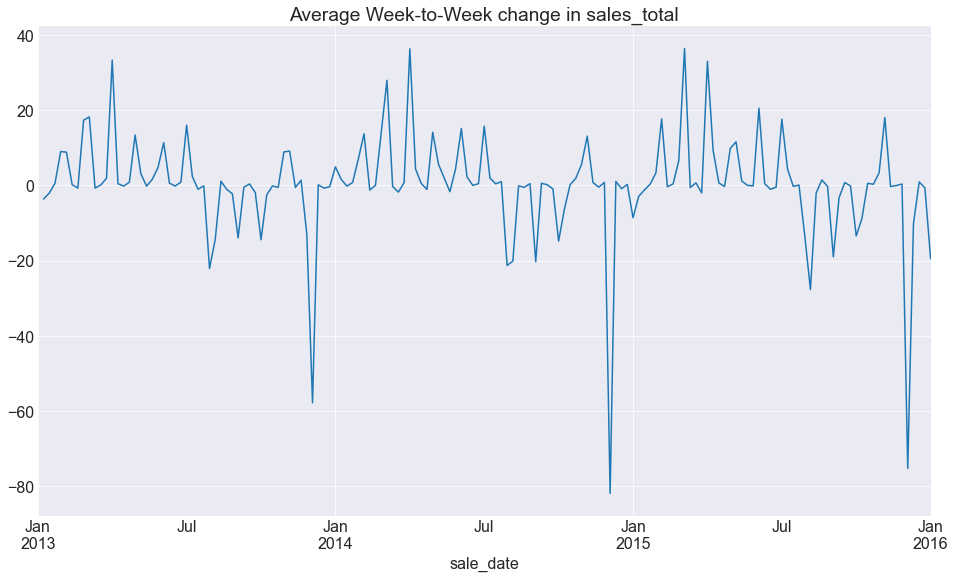

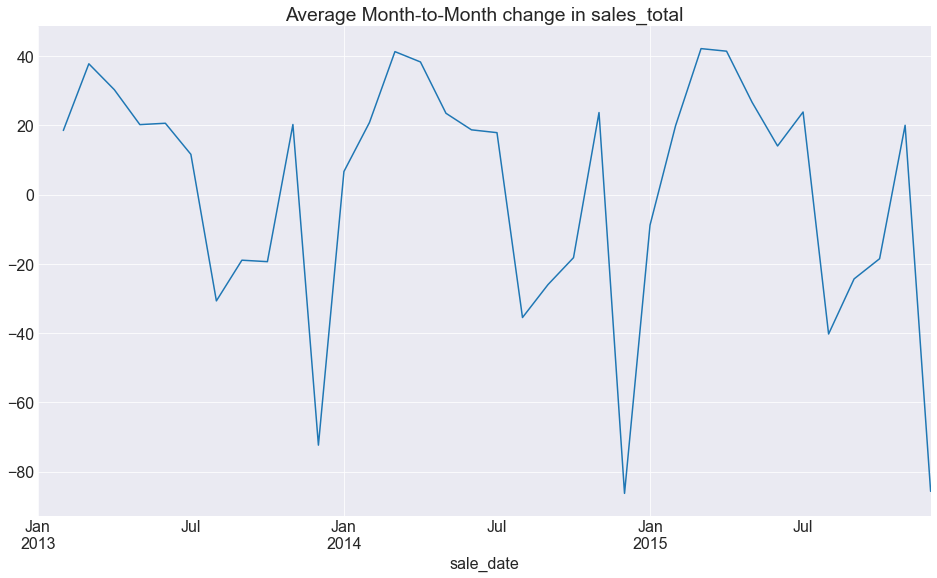

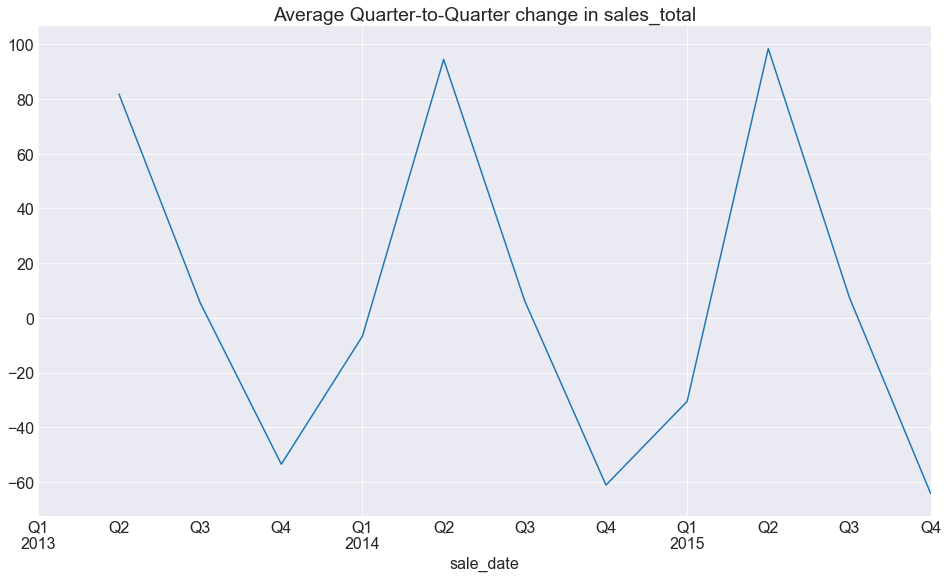

In [23]:
per = ['W', 'M', 'Q'] # list of periods by which to resample
per_name = ['Week', 'Month', 'Quarter'] # readable names of those periods
for col in cols:
    for i in range(len(per)):
        train[col].resample(per[i]).mean().diff().plot(title=f'Average {per_name[i]}-to-{per_name[i]} change in {col}')
        plt.show()

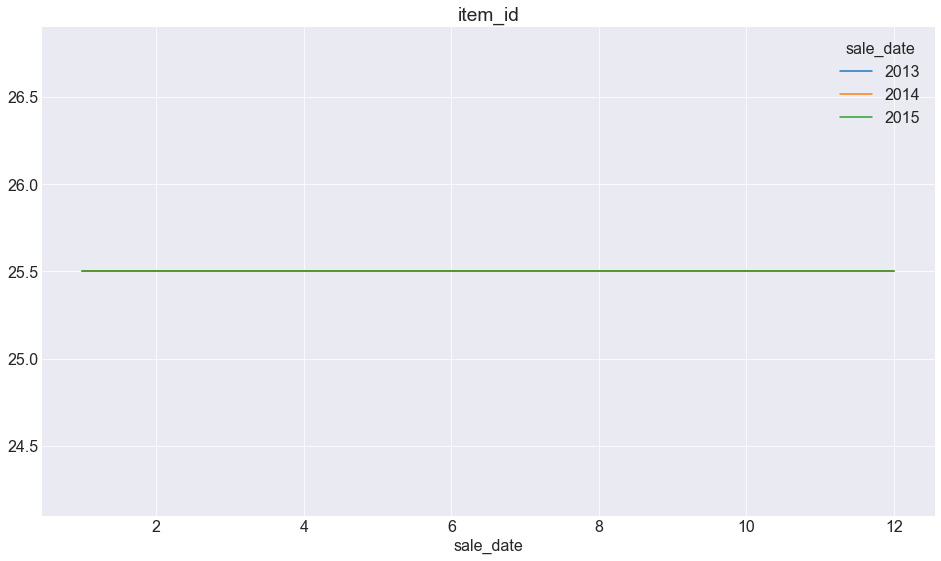

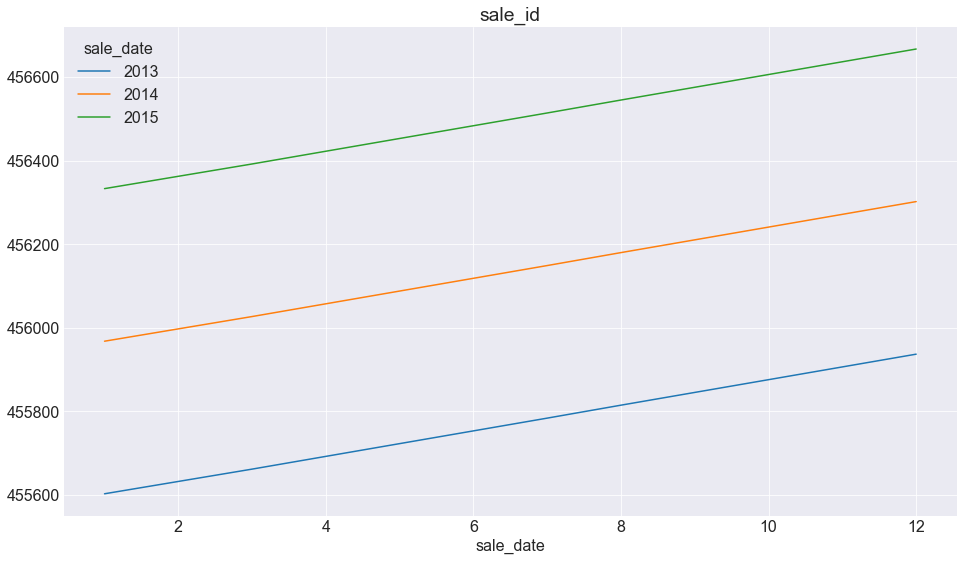

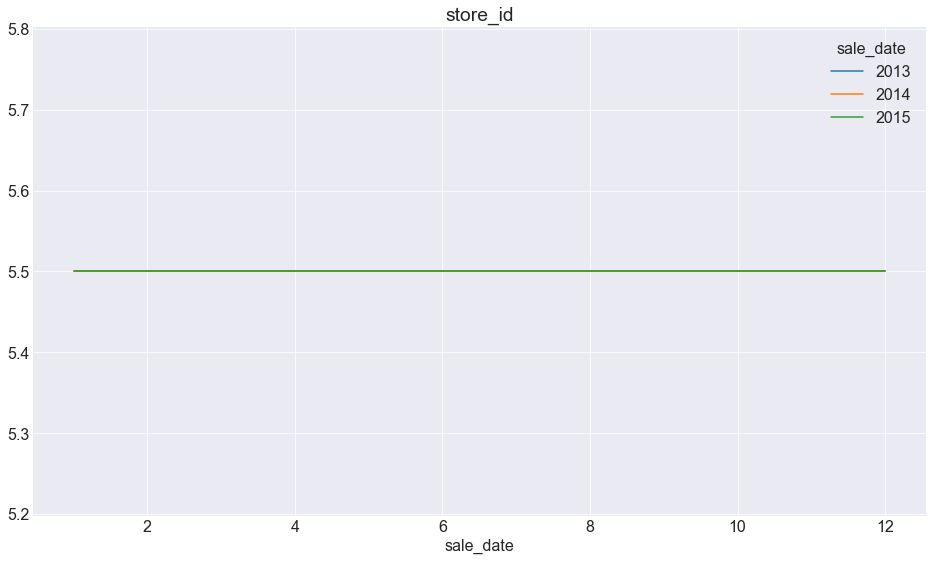

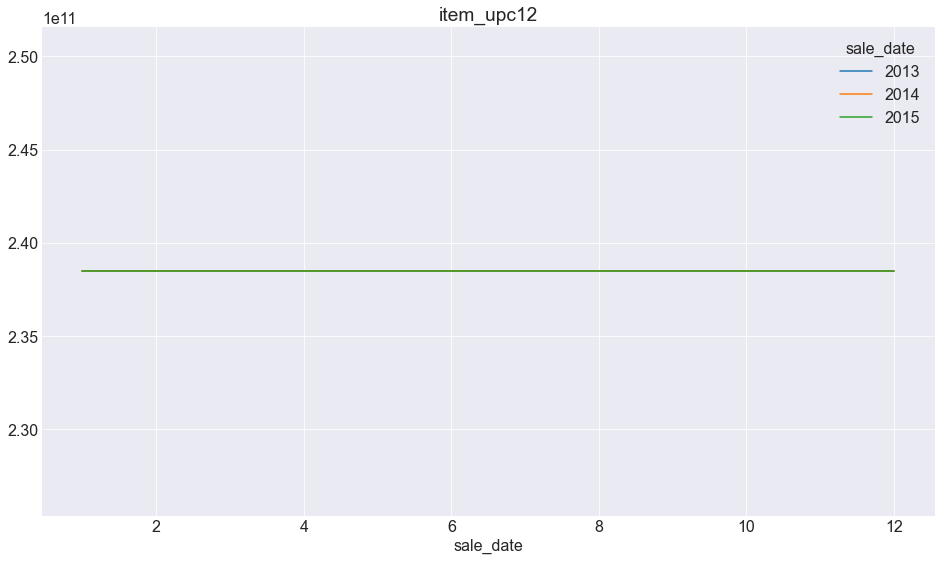

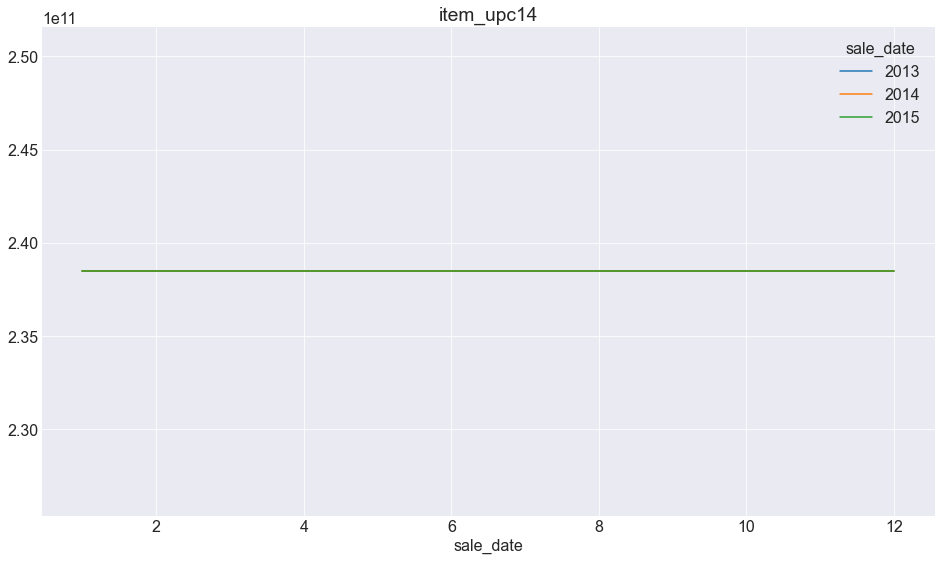

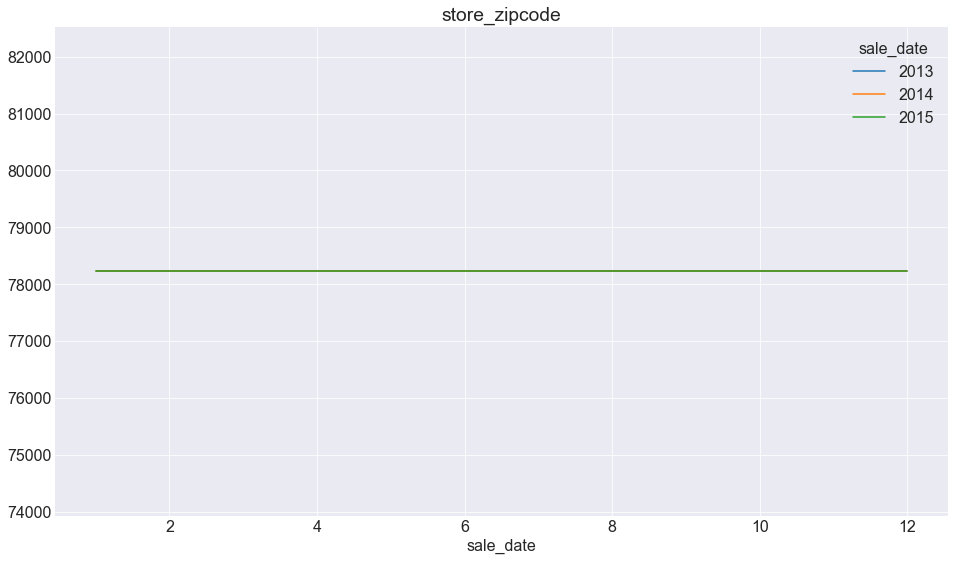

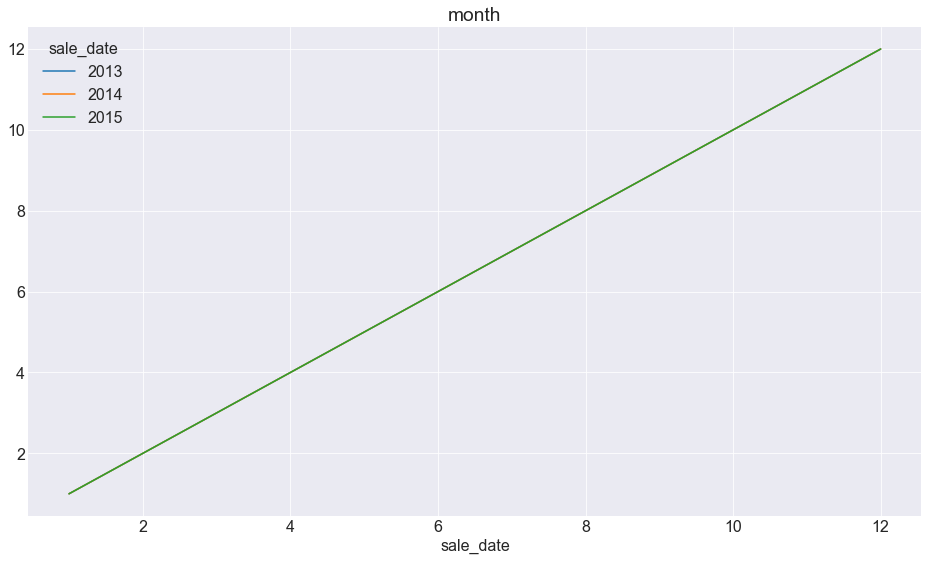

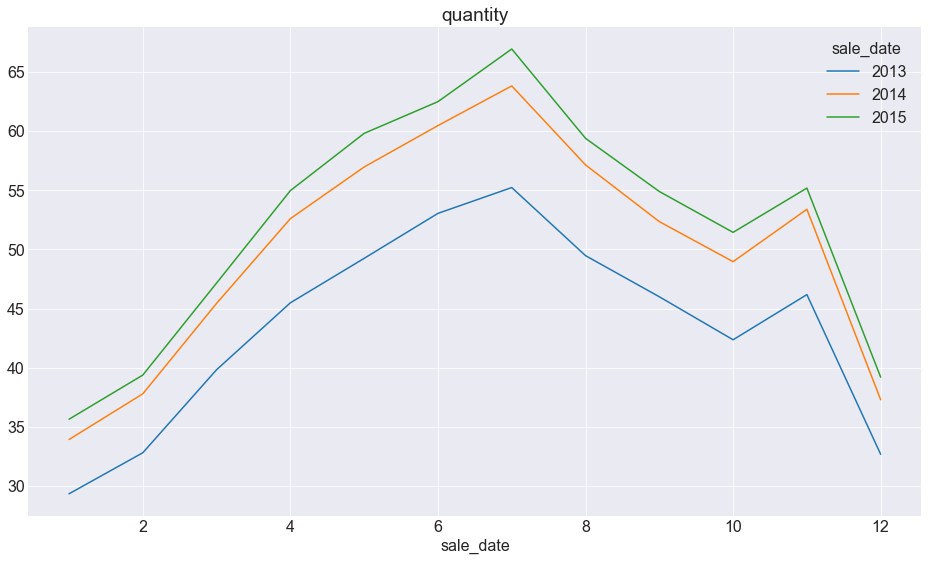

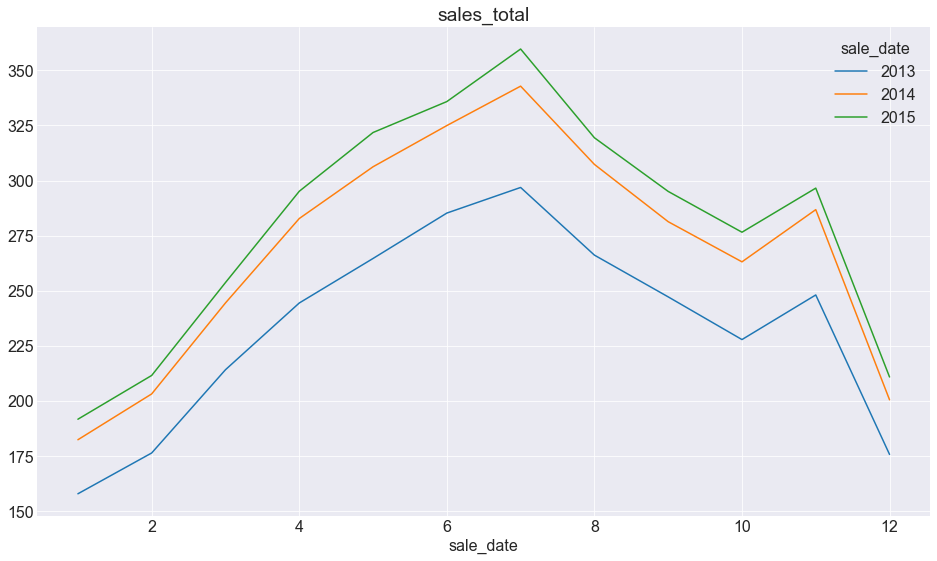

In [28]:
for col in cols:
    train[col].groupby([train[col].index.year, train[col].index.month]).mean().unstack(0).plot()
    plt.title(col)
    plt.show()

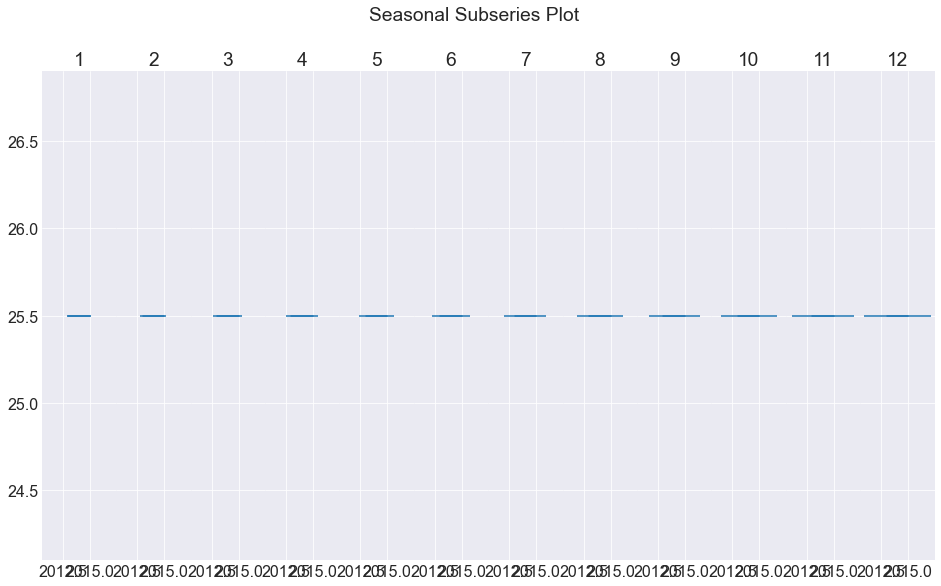

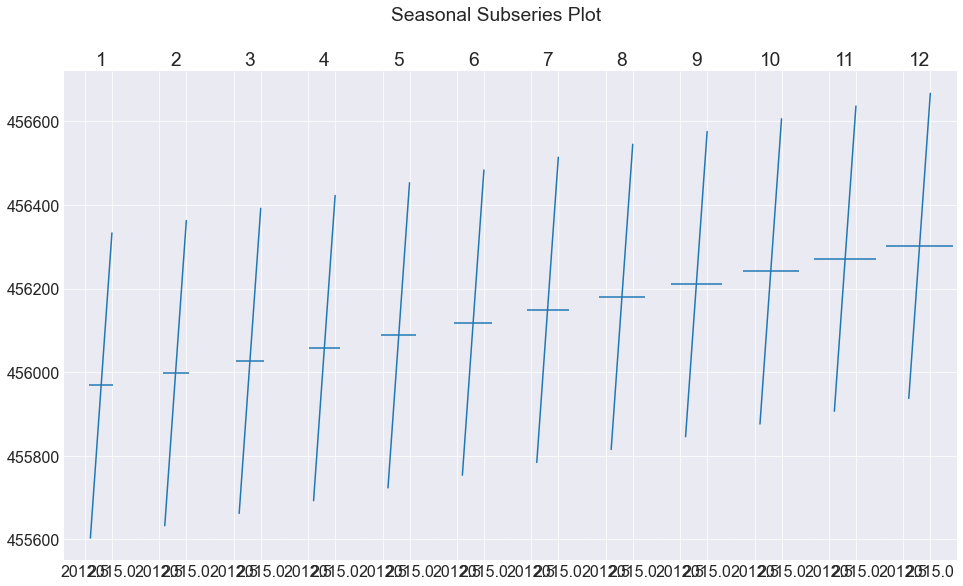

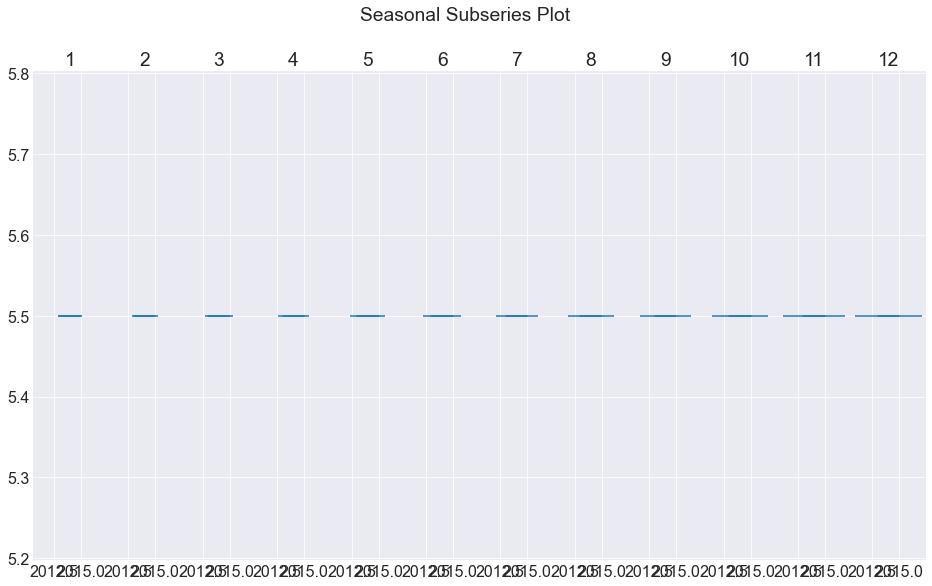

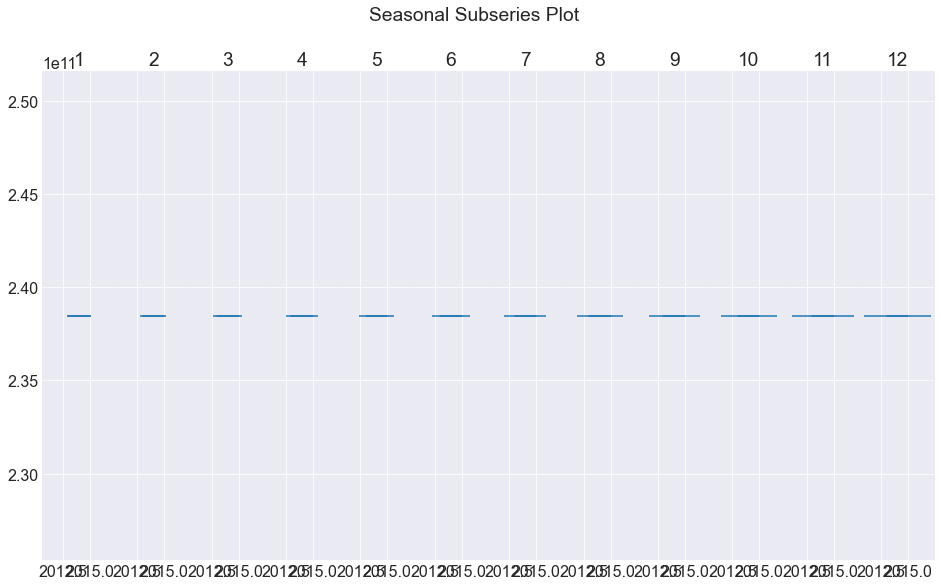

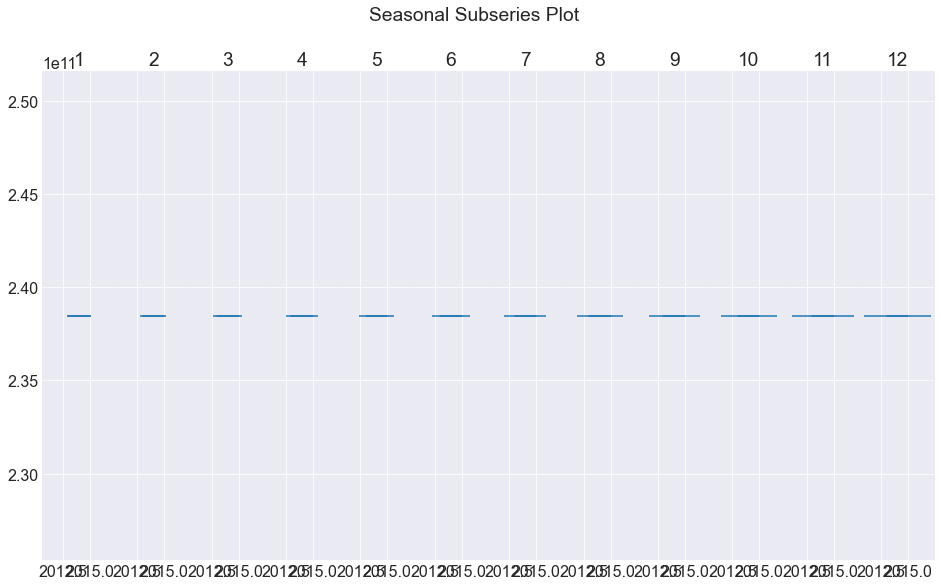

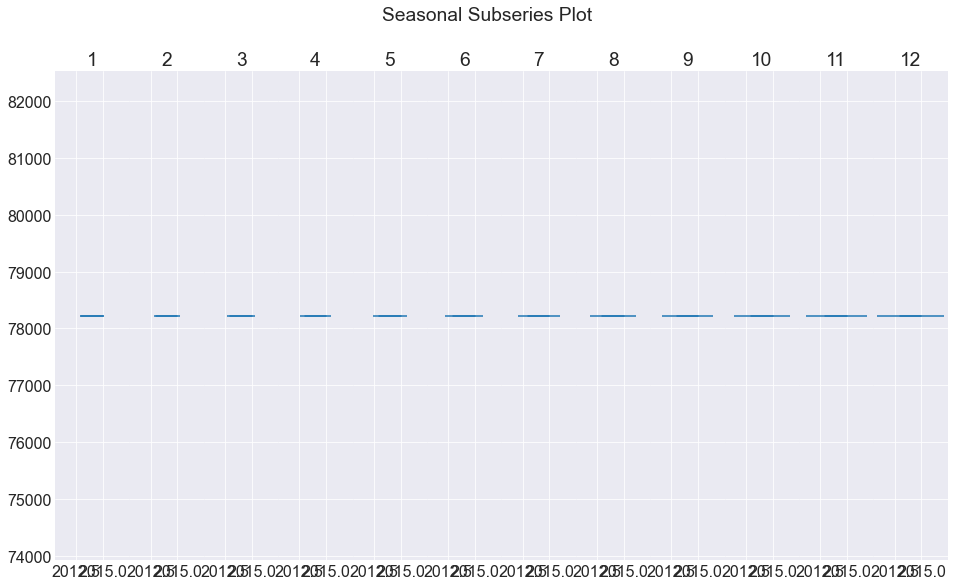

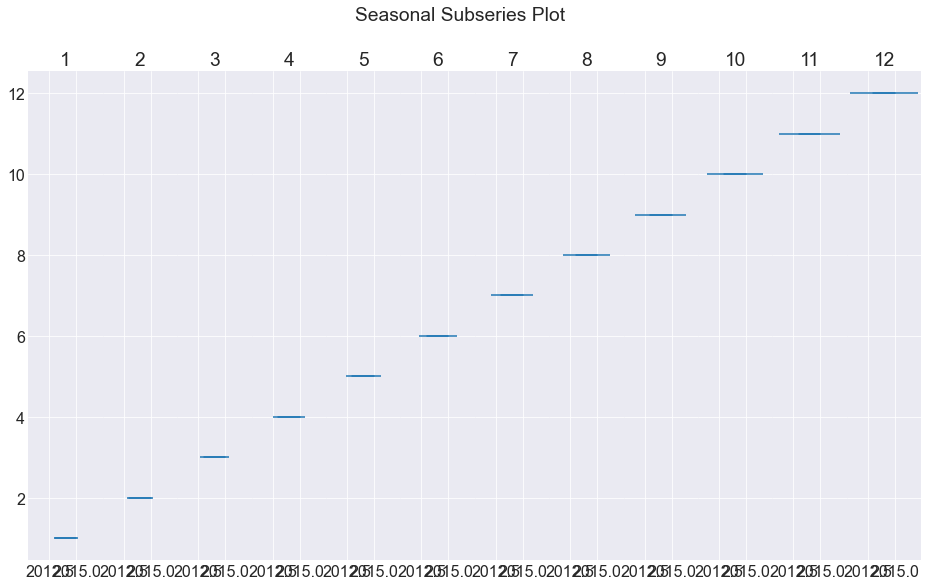

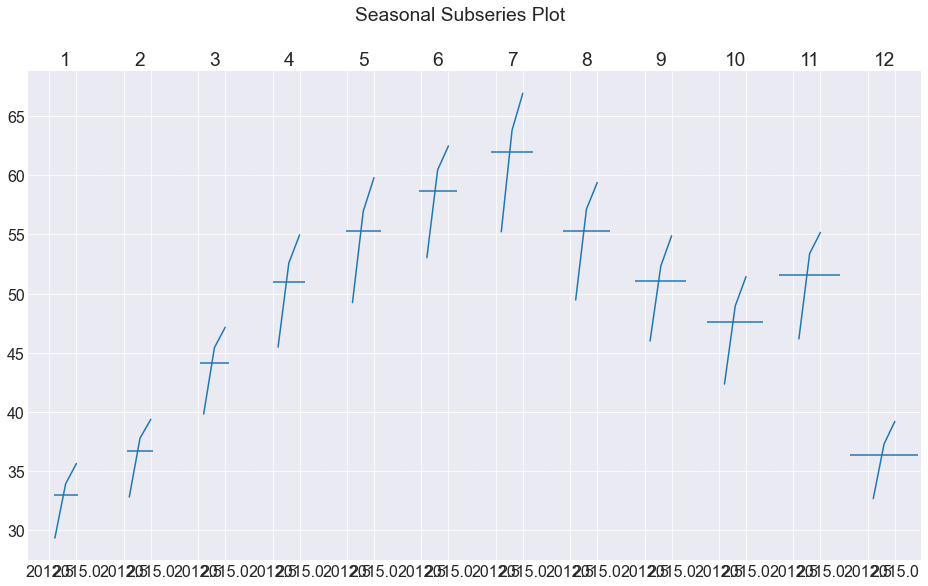

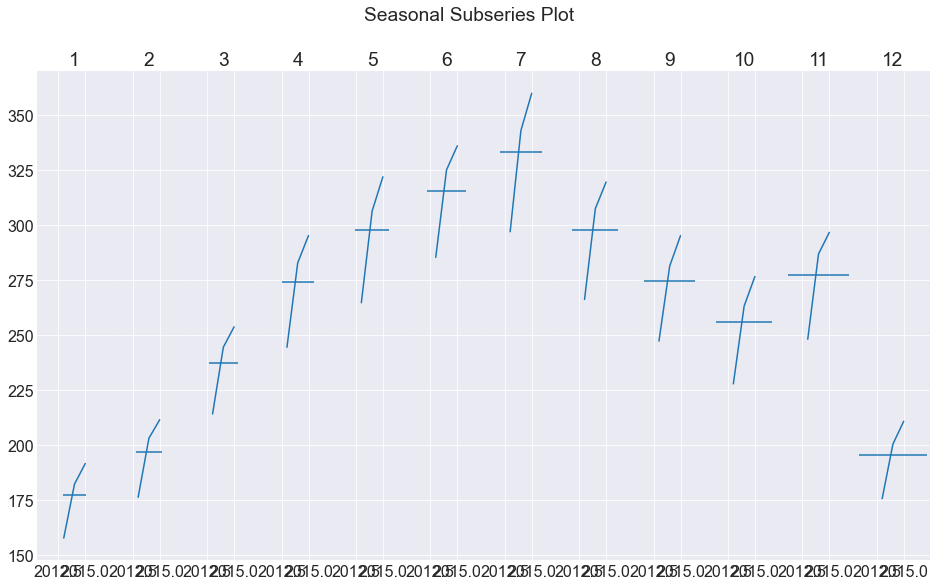

In [25]:
for col in cols:
    table = train[col].groupby([train[col].index.year, train[col].index.month]).mean().unstack()
    fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
    for ax, (month, subset) in zip(axs, table.iteritems()):
        subset.plot(ax=ax, title=month)
        ax.hlines(subset.mean(), *ax.get_xlim())
        ax.set(xlabel='')

    fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
    fig.subplots_adjust(wspace=0)

In [29]:
target = 'sales_total'

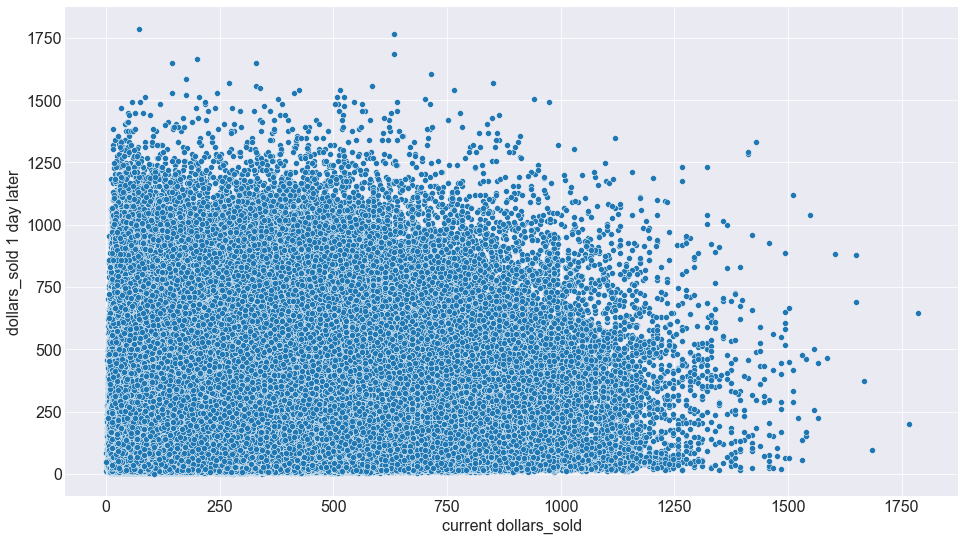

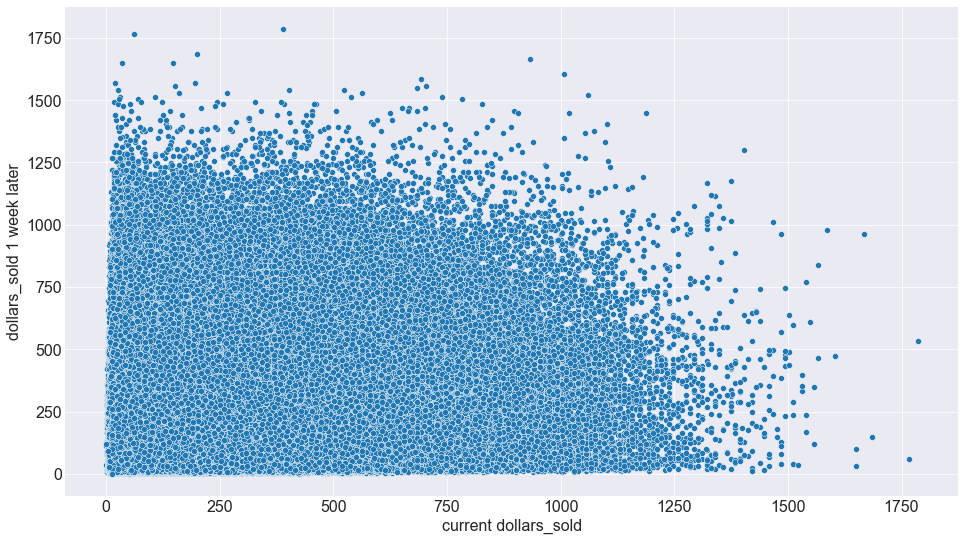

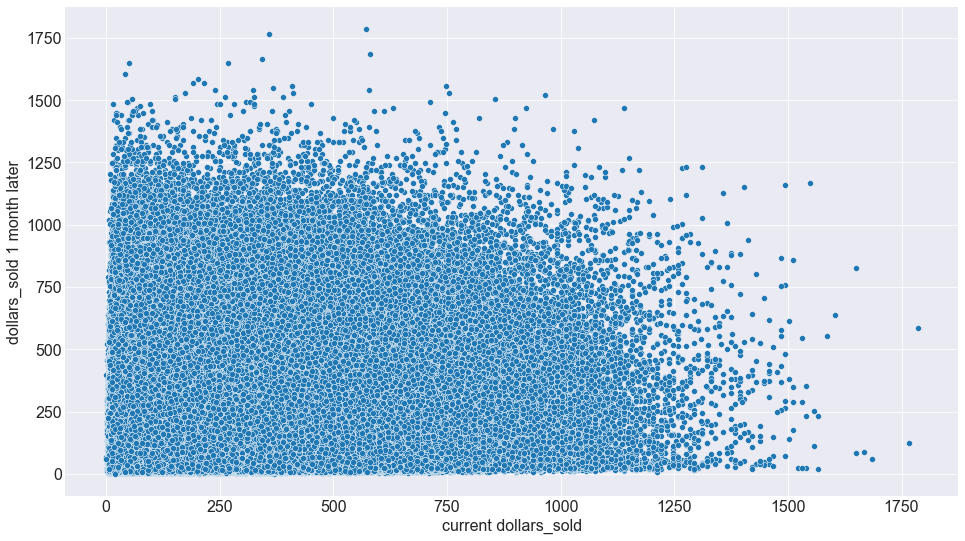

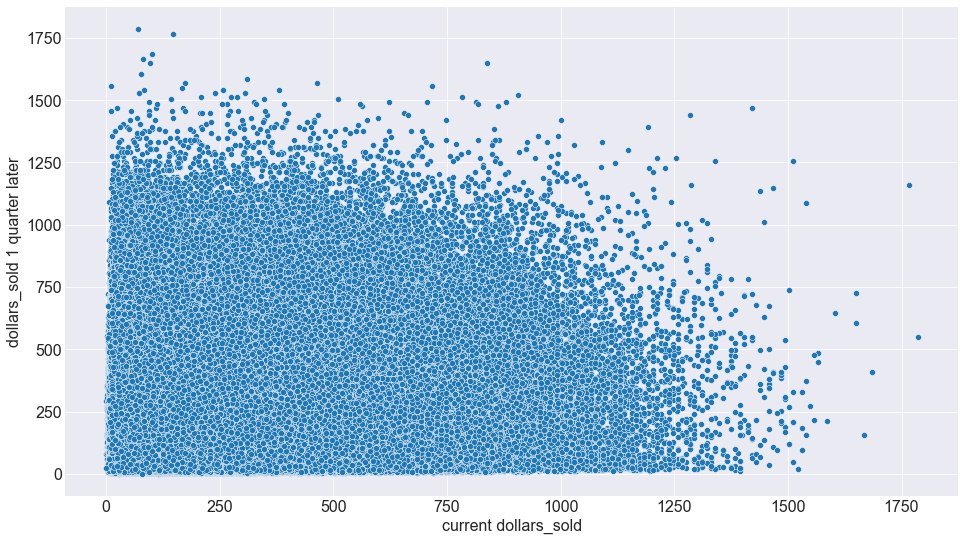

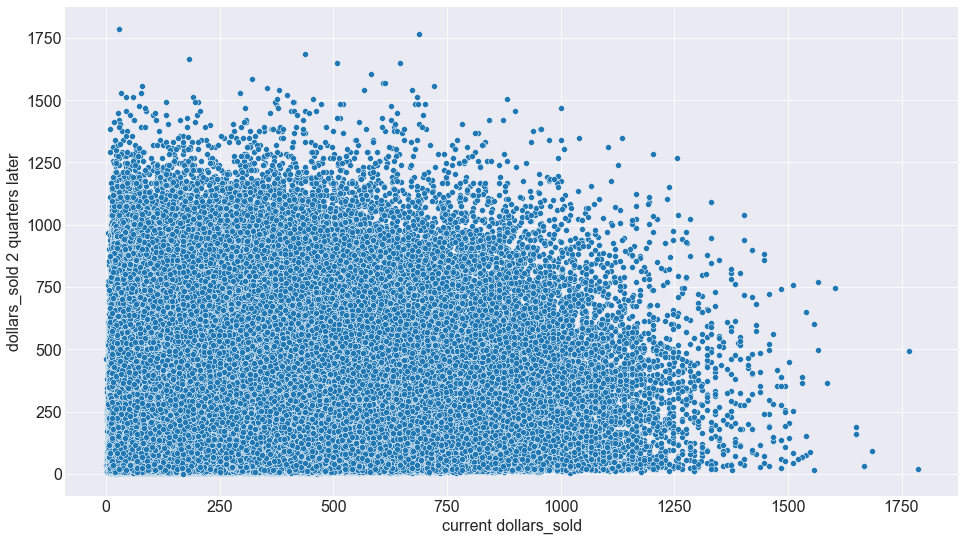

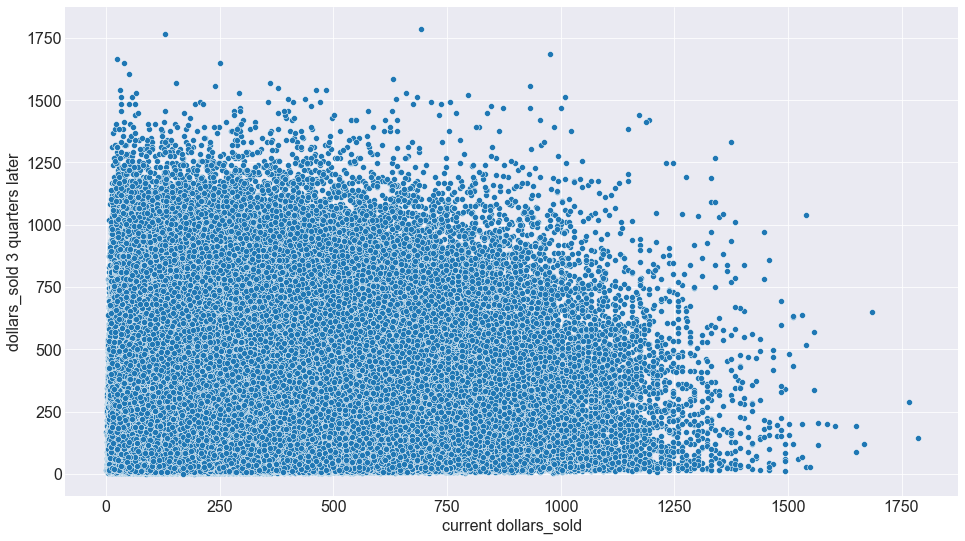

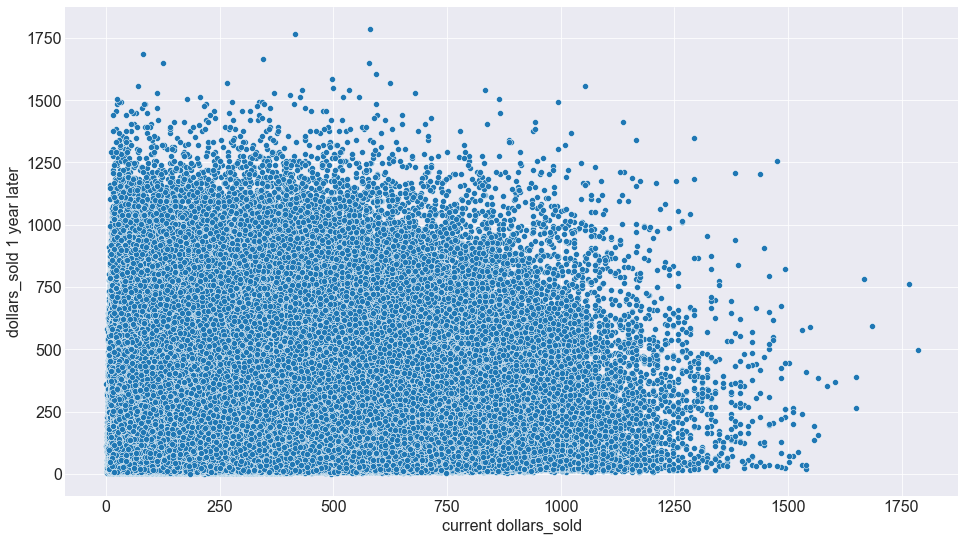

In [30]:
lag_times = [1, 7, 30, 30*3, 30*6, 30*9, 365]
lag_labels = ['1 day', '1 week', '1 month', '1 quarter', '2 quarters', '3 quarters', '1 year']

for lag_time, lag_label in zip(lag_times, lag_labels):
    sns.scatterplot(data=train, x=target, y=train[target].shift(-lag_time))
    plt.xlabel(f'current dollars_sold')
    plt.ylabel(f'dollars_sold {lag_label} later')
    plt.show()